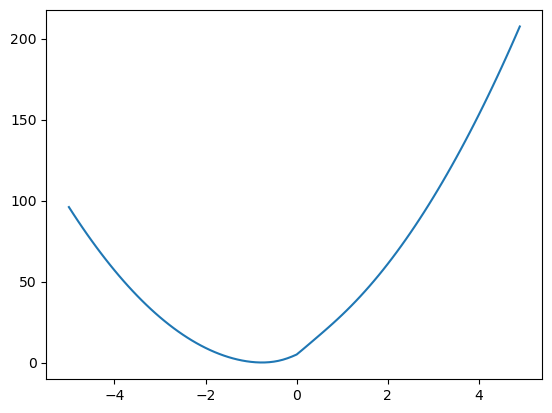

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

def sigmoid(x):
    function_value = 1/(1+np.exp(-x))
    return function_value

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)


def F(x ,alpha1 , alpha2 , alpha3 , alpha4 , alpha5 , alpha6 , teta1 , teta2 , teta3 ):
    return alpha1*sigmoid(teta1*x) + alpha2*tanh(teta2*x) + alpha3*relu(teta3*x) + alpha4*x**2 + alpha5*x + alpha6

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

xx = np.arange(-5, 5, 0.1)
yy = []
for i in xx:
    yy.append(F(i , 2 , 3 , 4 , 5 , 6 , 4 , 1.5 , 2 , 2.5 ))
yy = np.array(yy)

xx = xx.reshape((xx.shape[0],1))
yy = yy.reshape((yy.shape[0],1))

data = np.concatenate((xx, yy), axis=1)

df = pd.DataFrame(data)
df.to_csv('data.csv' , index=False)

plt.plot(data[:,0],data[:,1])


In [2]:
X , Y = data[:,0] , data[:,1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [4]:
mse(data[:,0] , y_predicted)

6150.67946480395

MSE : 3.2721152651203225


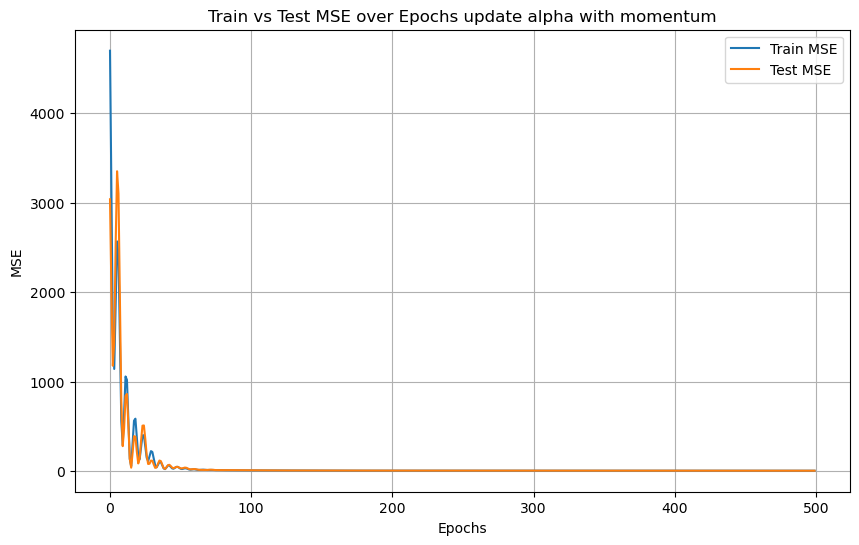

In [51]:
# پارامترهای اولیه
np.random.seed(42)
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
learning_rate = 0.001
momentum = 0.9

# متغیرهای مومنتوم برای آلفا و تتا
v_alpha = np.zeros_like(alpha)
v_teta = np.zeros_like(teta)

# تابع خطا (MSE)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

train_errors = []
test_errors = []

# گرادیان نزولی همراه با مومنتوم برای آلفا و تتا
for epoch in range(500):  # ۱۰۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_train = mse(y_train, y_pred_train)
    
    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)
    
    # محاسبه گرادیان نسبت به پارامترهای آلفا
    grad_alpha = np.zeros_like(alpha)
    for i in range(len(alpha)):
        delta = np.zeros_like(alpha)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, *(alpha + delta), teta[0], teta[1], teta[2])
        grad_alpha[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]
    
    # به‌روزرسانی پارامترهای آلفا با استفاده از مومنتوم
    v_alpha = momentum * v_alpha - learning_rate * grad_alpha
    alpha += v_alpha
    
    # به‌روزرسانی پارامترهای تتا با استفاده از مومنتوم
    v_teta = momentum * v_teta - learning_rate * grad_teta
    teta += v_teta
print('MSE :' , test_errors[-1])
# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE over Epochs update alpha with momentum')
plt.legend()
plt.grid(True)
plt.show()

MSE : 2708.418691715845


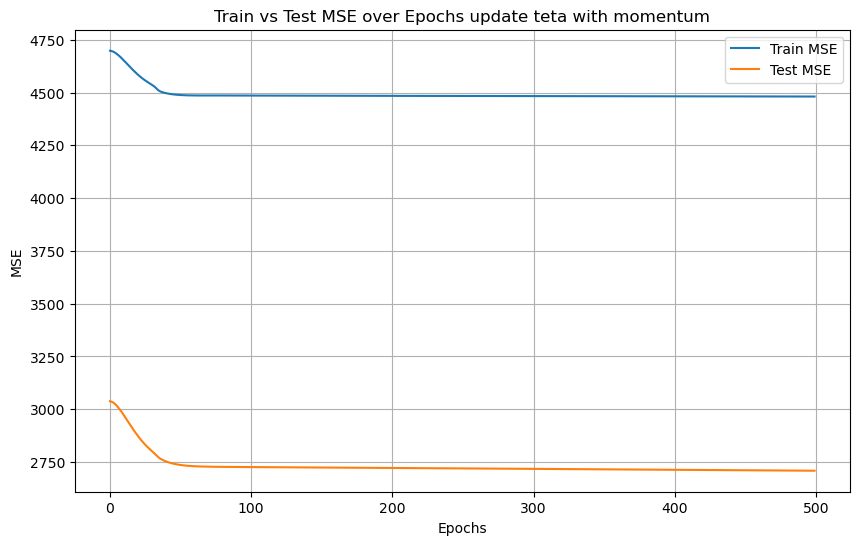

In [50]:
# پارامترهای اولیه
np.random.seed(42)
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
learning_rate = 0.001
momentum = 0.9

# متغیرهای مومنتوم برای آلفا و تتا
v_alpha = np.zeros_like(alpha)
v_teta = np.zeros_like(teta)

# تابع خطا (MSE)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

train_errors = []
test_errors = []

# گرادیان نزولی همراه با مومنتوم برای آلفا و تتا
for epoch in range(500):  # ۱۰۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_train = mse(y_train, y_pred_train)
    
    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)
    

    
    # محاسبه گرادیان نسبت به پارامترهای تتا
    grad_teta = np.zeros_like(teta)
    for i in range(len(teta)):
        delta = np.zeros_like(teta)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], *(teta + delta))
        grad_teta[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]
    
    # به‌روزرسانی پارامترهای آلفا با استفاده از مومنتوم
    v_alpha = momentum * v_alpha - learning_rate * grad_alpha
    alpha += v_alpha
    
    # به‌روزرسانی پارامترهای تتا با استفاده از مومنتوم
    v_teta = momentum * v_teta - learning_rate * grad_teta
    teta += v_teta
print('MSE :' , test_errors[-1])
# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE over Epochs update teta with momentum')
plt.legend()
plt.grid(True)
plt.show()

MSE : 1.1354848231582992


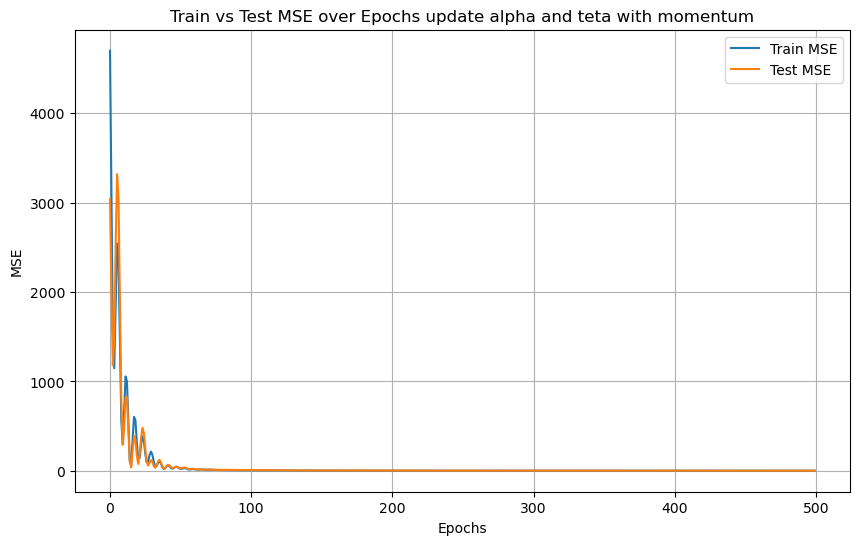

In [49]:
# پارامترهای اولیه
np.random.seed(42)
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
learning_rate = 0.001
momentum = 0.9

# متغیرهای مومنتوم برای آلفا و تتا
v_alpha = np.zeros_like(alpha)
v_teta = np.zeros_like(teta)

# تابع خطا (MSE)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

train_errors = []
test_errors = []

# گرادیان نزولی همراه با مومنتوم برای آلفا و تتا
for epoch in range(500):  # ۱۰۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_train = mse(y_train, y_pred_train)
    
    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)
    
    # محاسبه گرادیان نسبت به پارامترهای آلفا
    grad_alpha = np.zeros_like(alpha)
    for i in range(len(alpha)):
        delta = np.zeros_like(alpha)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, *(alpha + delta), teta[0], teta[1], teta[2])
        grad_alpha[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]
    
    # محاسبه گرادیان نسبت به پارامترهای تتا
    grad_teta = np.zeros_like(teta)
    for i in range(len(teta)):
        delta = np.zeros_like(teta)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], *(teta + delta))
        grad_teta[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]
    
    # به‌روزرسانی پارامترهای آلفا با استفاده از مومنتوم
    v_alpha = momentum * v_alpha - learning_rate * grad_alpha
    alpha += v_alpha
    
    # به‌روزرسانی پارامترهای تتا با استفاده از مومنتوم
    v_teta = momentum * v_teta - learning_rate * grad_teta
    teta += v_teta
print('MSE :' , test_errors[-1])
# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE over Epochs update alpha and teta with momentum')
plt.legend()
plt.grid(True)
plt.show()

MSE : 2.133595115036404


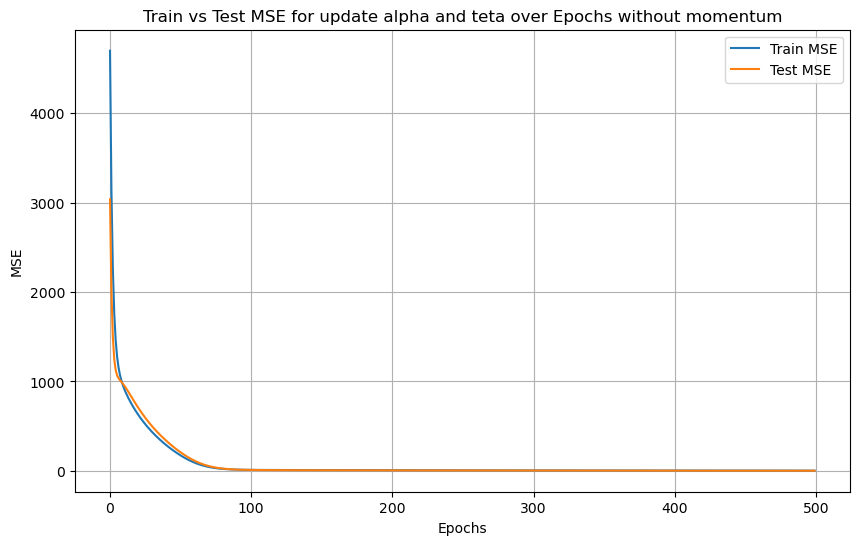

In [48]:
# پارامترهای اولیه
np.random.seed(42)
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
learning_rate = 0.001

train_errors = []
test_errors = []

# گرادیان نزولی بدون مومنتوم برای آلفا و تتا
for epoch in range(500):  # ۵۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_train = mse(y_train, y_pred_train)
    
    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)
    
    # محاسبه گرادیان نسبت به پارامترهای آلفا
    grad_alpha = np.zeros_like(alpha)
    for i in range(len(alpha)):
        delta = np.zeros_like(alpha)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, *(alpha + delta), teta[0], teta[1], teta[2])
        grad_alpha[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]
    
    # محاسبه گرادیان نسبت به پارامترهای تتا
    grad_teta = np.zeros_like(teta)
    for i in range(len(teta)):
        delta = np.zeros_like(teta)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], *(teta + delta))
        grad_teta[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]
    
    # به‌روزرسانی پارامترهای آلفا بدون مومنتوم
    alpha -= learning_rate * grad_alpha
    
    # به‌روزرسانی پارامترهای تتا بدون مومنتوم
    teta -= learning_rate * grad_teta

print('MSE :' , test_errors[-1])

# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE for update alpha and teta over Epochs without momentum')
plt.legend()
plt.grid(True)
plt.show()

MSE : 2674.4611830783824


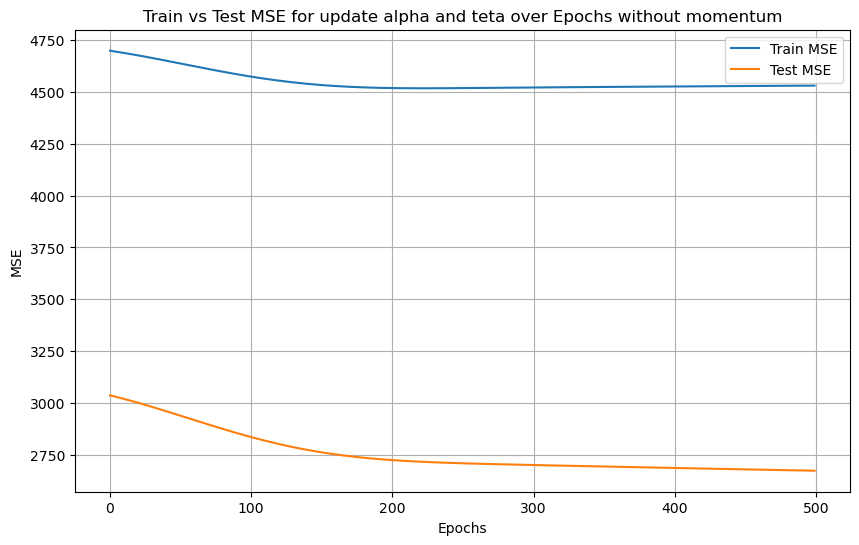

In [47]:
# پارامترهای اولیه
np.random.seed(42)
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
learning_rate = 0.001

train_errors = []
test_errors = []

# گرادیان نزولی بدون مومنتوم برای آلفا و تتا
for epoch in range(500):  # ۵۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_train = mse(y_train, y_pred_train)
    
    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)
    
    
    # محاسبه گرادیان نسبت به پارامترهای تتا
    grad_teta = np.zeros_like(teta)
    for i in range(len(teta)):
        delta = np.zeros_like(teta)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], *(teta + delta))
        grad_teta[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]
    
    # به‌روزرسانی پارامترهای آلفا بدون مومنتوم
    alpha -= learning_rate * grad_alpha
    
    # به‌روزرسانی پارامترهای تتا بدون مومنتوم
    teta -= learning_rate * grad_teta

print('MSE :' , test_errors[-1])

# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE for update alpha and teta over Epochs without momentum')
plt.legend()
plt.grid(True)
plt.show()

MSE : 18.7752186928803


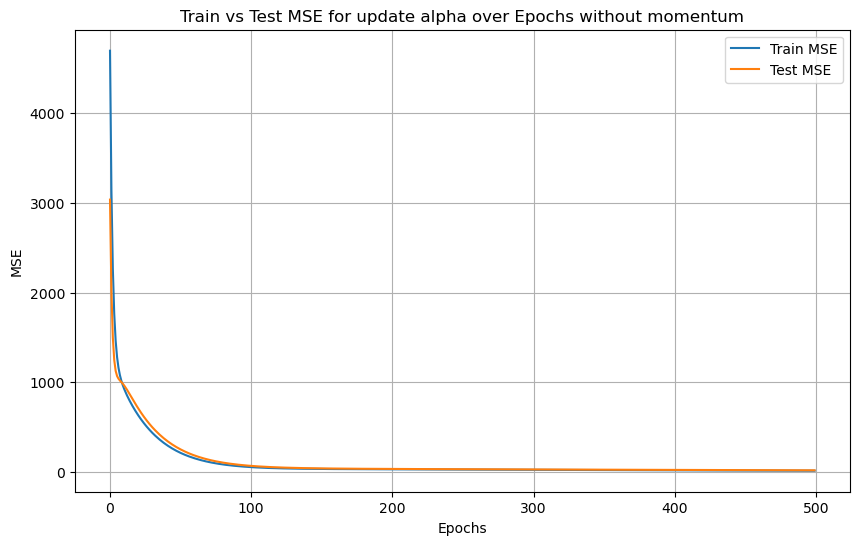

In [45]:
# پارامترهای اولیه
np.random.seed(42)
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
learning_rate = 0.001

train_errors = []
test_errors = []

# گرادیان نزولی بدون مومنتوم برای آلفا و تتا
for epoch in range(500):  # ۵۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_train = mse(y_train, y_pred_train)
    
    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)
    
    # محاسبه گرادیان نسبت به پارامترهای آلفا
    grad_alpha = np.zeros_like(alpha)
    for i in range(len(alpha)):
        delta = np.zeros_like(alpha)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, *(alpha + delta), teta[0], teta[1], teta[2])
        grad_alpha[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]
    
    # به‌روزرسانی پارامترهای آلفا بدون مومنتوم
    alpha -= learning_rate * grad_alpha
    
    # به‌روزرسانی پارامترهای تتا بدون مومنتوم
    teta -= learning_rate * grad_teta

print('MSE :' , test_errors[-1])

# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE for update alpha over Epochs without momentum')
plt.legend()
plt.grid(True)
plt.show()

MSE : 0.09672548659769759


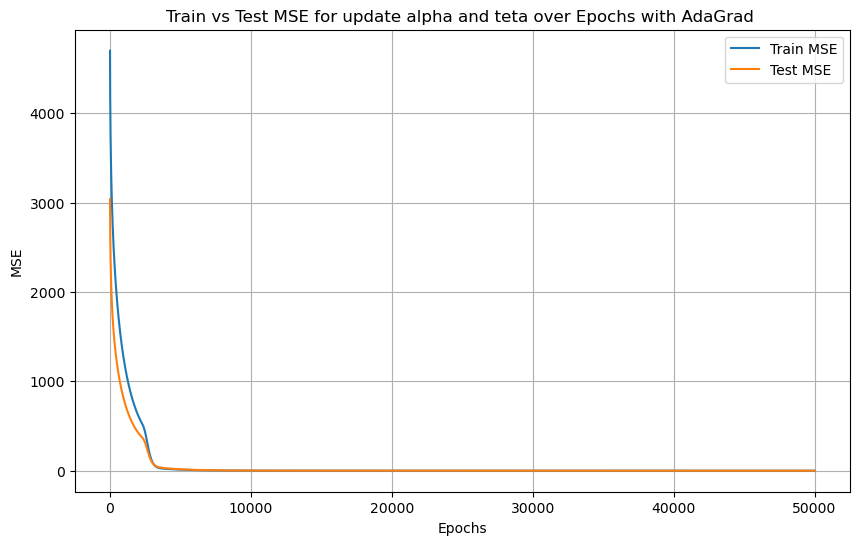

In [62]:
# دیرتر همگرا میشود به همین دلیل باید تعداد ایپاک و نرخ یادگیری را بیشتر بگیریم
# پارامترهای اولیه
np.random.seed(42)
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
learning_rate = 0.05
epsilon = 1e-8  # مقدار کوچک برای جلوگیری از تقسیم بر صفر

# متغیرهای Adagrad
grad_squared_alpha = np.zeros_like(alpha)
grad_squared_teta = np.zeros_like(teta)

train_errors = []
test_errors = []

# گرادیان نزولی با AdaGrad برای آلفا و تتا
for epoch in range(50000):  # ۵۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_train = mse(y_train, y_pred_train)
    
    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)
    
    # محاسبه گرادیان نسبت به پارامترهای آلفا
    grad_alpha = np.zeros_like(alpha)
    for i in range(len(alpha)):
        delta = np.zeros_like(alpha)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, *(alpha + delta), teta[0], teta[1], teta[2])
        grad_alpha[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]
    
    # محاسبه گرادیان نسبت به پارامترهای تتا
    grad_teta = np.zeros_like(teta)
    for i in range(len(teta)):
        delta = np.zeros_like(teta)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], *(teta + delta))
        grad_teta[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]
    
    # مجموع مربعات گرادیان‌ها
    grad_squared_alpha += grad_alpha ** 2
    grad_squared_teta += grad_teta ** 2
    
    # به‌روزرسانی پارامترهای آلفا با استفاده از AdaGrad
    alpha -= (learning_rate / (np.sqrt(grad_squared_alpha) + epsilon)) * grad_alpha
    
    # به‌روزرسانی پارامترهای تتا با استفاده از AdaGrad
    teta -= (learning_rate / (np.sqrt(grad_squared_teta) + epsilon)) * grad_teta

print('MSE :' , test_errors[-1])

# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE for update alpha and teta over Epochs with AdaGrad ')
plt.legend()
plt.grid(True)
plt.show()

MSE : 20.57721584848396


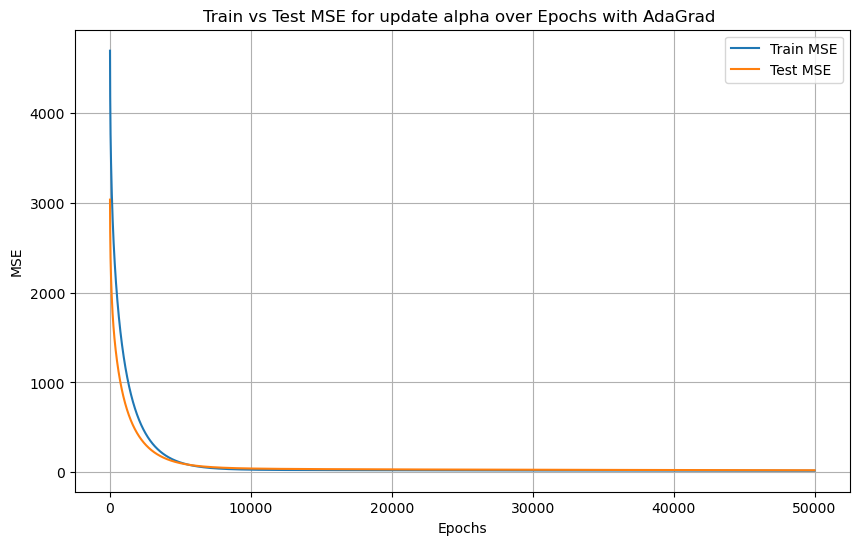

In [63]:
# دیرتر همگرا میشود به همین دلیل باید تعداد ایپاک و نرخ یادگیری را بیشتر بگیریم
# پارامترهای اولیه
np.random.seed(42)
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
learning_rate = 0.05
epsilon = 1e-8  # مقدار کوچک برای جلوگیری از تقسیم بر صفر

# متغیرهای Adagrad
grad_squared_alpha = np.zeros_like(alpha)
grad_squared_teta = np.zeros_like(teta)

train_errors = []
test_errors = []

# گرادیان نزولی با AdaGrad برای آلفا و تتا
for epoch in range(50000):  # ۵۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_train = mse(y_train, y_pred_train)
    
    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)
    
    # محاسبه گرادیان نسبت به پارامترهای آلفا
    grad_alpha = np.zeros_like(alpha)
    for i in range(len(alpha)):
        delta = np.zeros_like(alpha)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, *(alpha + delta), teta[0], teta[1], teta[2])
        grad_alpha[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]
    
    # مجموع مربعات گرادیان‌ها
    grad_squared_alpha += grad_alpha ** 2
    grad_squared_teta += grad_teta ** 2
    
    # به‌روزرسانی پارامترهای آلفا با استفاده از AdaGrad
    alpha -= (learning_rate / (np.sqrt(grad_squared_alpha) + epsilon)) * grad_alpha
    
    # به‌روزرسانی پارامترهای تتا با استفاده از AdaGrad
    teta -= (learning_rate / (np.sqrt(grad_squared_teta) + epsilon)) * grad_teta

print('MSE :' , test_errors[-1])

# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE for update alpha over Epochs with AdaGrad ')
plt.legend()
plt.grid(True)
plt.show()

MSE : 14109.636972251392


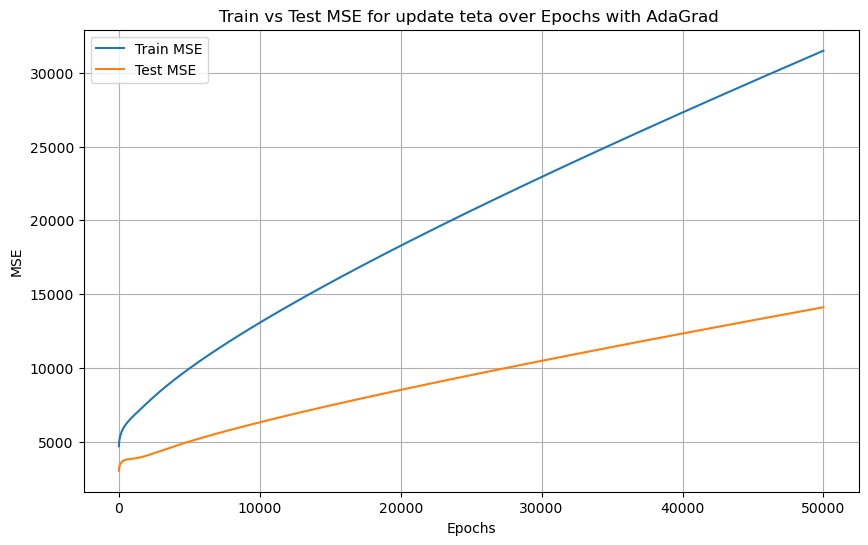

In [64]:
# دیرتر همگرا میشود به همین دلیل باید تعداد ایپاک و نرخ یادگیری را بیشتر بگیریم
# پارامترهای اولیه
np.random.seed(42)
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
learning_rate = 0.05
epsilon = 1e-8  # مقدار کوچک برای جلوگیری از تقسیم بر صفر

# متغیرهای Adagrad
grad_squared_alpha = np.zeros_like(alpha)
grad_squared_teta = np.zeros_like(teta)

train_errors = []
test_errors = []

# گرادیان نزولی با AdaGrad برای آلفا و تتا
for epoch in range(50000):  # ۵۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_train = mse(y_train, y_pred_train)
    
    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)
    
    
    # محاسبه گرادیان نسبت به پارامترهای تتا
    grad_teta = np.zeros_like(teta)
    for i in range(len(teta)):
        delta = np.zeros_like(teta)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], *(teta + delta))
        grad_teta[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]
    
    # مجموع مربعات گرادیان‌ها
    grad_squared_alpha += grad_alpha ** 2
    grad_squared_teta += grad_teta ** 2
    
    # به‌روزرسانی پارامترهای آلفا با استفاده از AdaGrad
    alpha -= (learning_rate / (np.sqrt(grad_squared_alpha) + epsilon)) * grad_alpha
    
    # به‌روزرسانی پارامترهای تتا با استفاده از AdaGrad
    teta -= (learning_rate / (np.sqrt(grad_squared_teta) + epsilon)) * grad_teta

print('MSE :' , test_errors[-1])

# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE for update teta over Epochs with AdaGrad ')
plt.legend()
plt.grid(True)
plt.show()

MSE : 0.009961035236497193


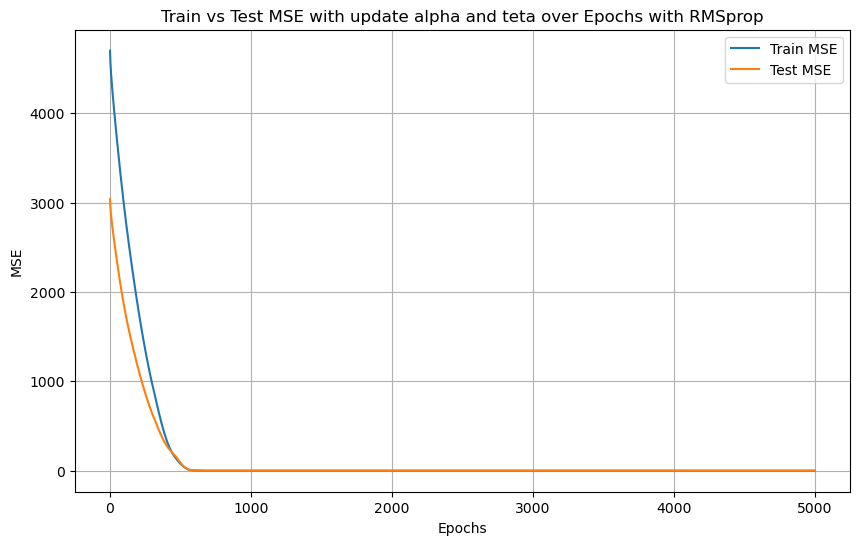

In [83]:
# پارامترهای اولیه
np.random.seed(42)
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
learning_rate = 0.01
rho = 0.9  # فاکتور فراموشی
epsilon = 1e-8  # مقدار کوچک برای جلوگیری از تقسیم بر صفر

# متغیرهای RMSprop
grad_squared_alpha = np.zeros_like(alpha)
grad_squared_teta = np.zeros_like(teta)

train_errors = []
test_errors = []

# گرادیان نزولی با RMSprop برای آلفا و تتا
for epoch in range(5000):  # ۵۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_train = mse(y_train, y_pred_train)
    
    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)
    
    # محاسبه گرادیان نسبت به پارامترهای آلفا
    grad_alpha = np.zeros_like(alpha)
    for i in range(len(alpha)):
        delta = np.zeros_like(alpha)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, *(alpha + delta), teta[0], teta[1], teta[2])
        grad_alpha[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]
    
    # محاسبه گرادیان نسبت به پارامترهای تتا
    grad_teta = np.zeros_like(teta)
    for i in range(len(teta)):
        delta = np.zeros_like(teta)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], *(teta + delta))
        grad_teta[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]
    
    # به‌روزرسانی مجموع مربعات گرادیان‌ها با میانگین نمایی
    grad_squared_alpha = rho * grad_squared_alpha + (1 - rho) * (grad_alpha ** 2)
    grad_squared_teta = rho * grad_squared_teta + (1 - rho) * (grad_teta ** 2)
    
    # به‌روزرسانی پارامترهای آلفا با استفاده از RMSprop
    alpha -= (learning_rate / (np.sqrt(grad_squared_alpha) + epsilon)) * grad_alpha
    
    # به‌روزرسانی پارامترهای تتا با استفاده از RMSprop
    teta -= (learning_rate / (np.sqrt(grad_squared_teta) + epsilon)) * grad_teta

print('MSE :' , test_errors[-1])

# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE with update alpha and teta over Epochs with RMSprop')
plt.legend()
plt.grid(True)
plt.show()

MSE : 0.47024919207988525


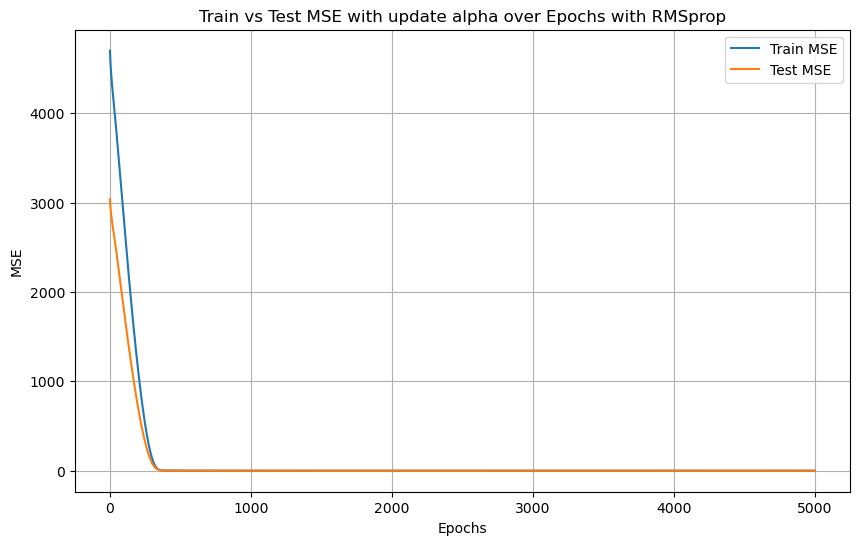

In [84]:
# پارامترهای اولیه
np.random.seed(42)
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
learning_rate = 0.01
rho = 0.9  # فاکتور فراموشی
epsilon = 1e-8  # مقدار کوچک برای جلوگیری از تقسیم بر صفر

# متغیرهای RMSprop
grad_squared_alpha = np.zeros_like(alpha)
grad_squared_teta = np.zeros_like(teta)

train_errors = []
test_errors = []

# گرادیان نزولی با RMSprop برای آلفا و تتا
for epoch in range(5000):  # ۵۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_train = mse(y_train, y_pred_train)
    
    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)
    
    # محاسبه گرادیان نسبت به پارامترهای آلفا
    grad_alpha = np.zeros_like(alpha)
    for i in range(len(alpha)):
        delta = np.zeros_like(alpha)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, *(alpha + delta), teta[0], teta[1], teta[2])
        grad_alpha[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]
    
    # به‌روزرسانی مجموع مربعات گرادیان‌ها با میانگین نمایی
    grad_squared_alpha = rho * grad_squared_alpha + (1 - rho) * (grad_alpha ** 2)
    grad_squared_teta = rho * grad_squared_teta + (1 - rho) * (grad_teta ** 2)
    
    # به‌روزرسانی پارامترهای آلفا با استفاده از RMSprop
    alpha -= (learning_rate / (np.sqrt(grad_squared_alpha) + epsilon)) * grad_alpha
    
    # به‌روزرسانی پارامترهای تتا با استفاده از RMSprop
    teta -= (learning_rate / (np.sqrt(grad_squared_teta) + epsilon)) * grad_teta

print('MSE :' , test_errors[-1])

# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE with update alpha over Epochs with RMSprop')
plt.legend()
plt.grid(True)
plt.show()

MSE : 275391.85380019294


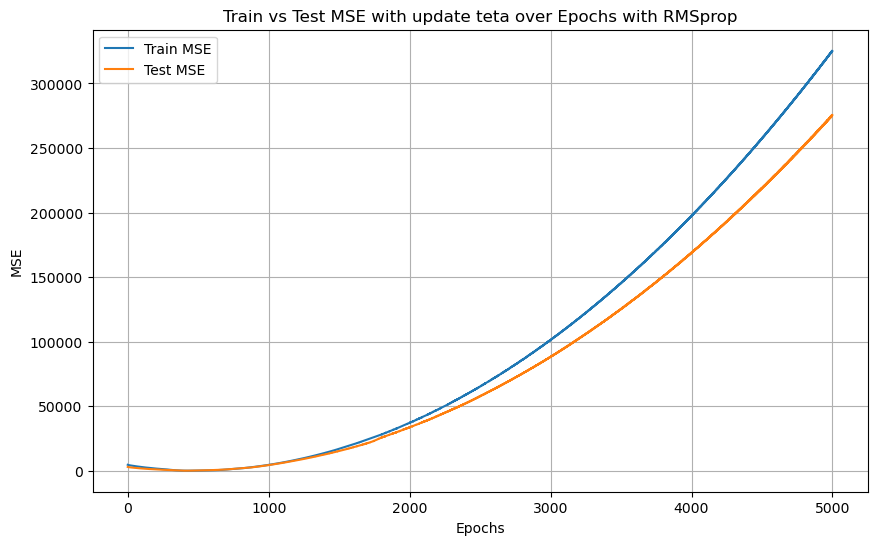

In [85]:
# پارامترهای اولیه
np.random.seed(42)
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
learning_rate = 0.01
rho = 0.9  # فاکتور فراموشی
epsilon = 1e-8  # مقدار کوچک برای جلوگیری از تقسیم بر صفر

# متغیرهای RMSprop
grad_squared_alpha = np.zeros_like(alpha)
grad_squared_teta = np.zeros_like(teta)

train_errors = []
test_errors = []

# گرادیان نزولی با RMSprop برای آلفا و تتا
for epoch in range(5000):  # ۵۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_train = mse(y_train, y_pred_train)
    
    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)
    
    # محاسبه گرادیان نسبت به پارامترهای تتا
    grad_teta = np.zeros_like(teta)
    for i in range(len(teta)):
        delta = np.zeros_like(teta)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], *(teta + delta))
        grad_teta[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]
    
    # به‌روزرسانی مجموع مربعات گرادیان‌ها با میانگین نمایی
    grad_squared_alpha = rho * grad_squared_alpha + (1 - rho) * (grad_alpha ** 2)
    grad_squared_teta = rho * grad_squared_teta + (1 - rho) * (grad_teta ** 2)
    
    # به‌روزرسانی پارامترهای آلفا با استفاده از RMSprop
    alpha -= (learning_rate / (np.sqrt(grad_squared_alpha) + epsilon)) * grad_alpha
    
    # به‌روزرسانی پارامترهای تتا با استفاده از RMSprop
    teta -= (learning_rate / (np.sqrt(grad_squared_teta) + epsilon)) * grad_teta

print('MSE :' , test_errors[-1])

# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE with update teta over Epochs with RMSprop')
plt.legend()
plt.grid(True)
plt.show()

MSE : 0.018958438798846726


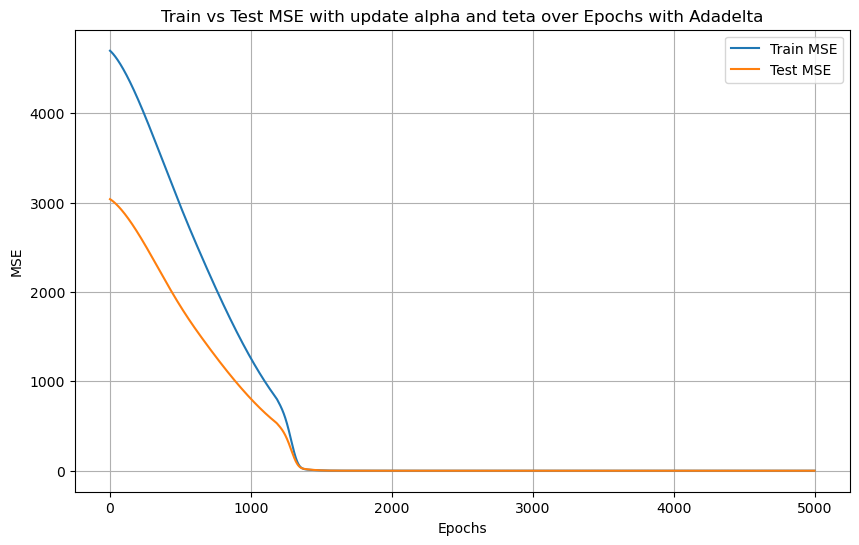

In [89]:
np.random.seed(42)
# پارامترهای اولیه
np.random.seed(42)
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
rho = 0.8  # فاکتور فراموشی
epsilon = 1e-7  # مقدار کوچک برای جلوگیری از تقسیم بر صفر

# متغیرهای Adadelta
grad_squared_alpha = np.zeros_like(alpha)
grad_squared_teta = np.zeros_like(teta)
delta_squared_alpha = np.zeros_like(alpha)
delta_squared_teta = np.zeros_like(teta)

train_errors = []
test_errors = []

# گرادیان نزولی با Adadelta برای آلفا و تتا
for epoch in range(5000):  # ۵۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_train = mse(y_train, y_pred_train)
    
    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)
    
    # محاسبه گرادیان نسبت به پارامترهای آلفا
    grad_alpha = np.zeros_like(alpha)
    for i in range(len(alpha)):
        delta = np.zeros_like(alpha)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, *(alpha + delta), teta[0], teta[1], teta[2])
        grad_alpha[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]
    
    # محاسبه گرادیان نسبت به پارامترهای تتا
    grad_teta = np.zeros_like(teta)
    for i in range(len(teta)):
        delta = np.zeros_like(teta)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], *(teta + delta))
        grad_teta[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]
    
    # به‌روزرسانی مجموع مربعات گرادیان‌ها با میانگین نمایی
    grad_squared_alpha = rho * grad_squared_alpha + (1 - rho) * (grad_alpha ** 2)
    grad_squared_teta = rho * grad_squared_teta + (1 - rho) * (grad_teta ** 2)
    
    # محاسبه مقدار به‌روزرسانی پارامترهای آلفا و تتا
    update_alpha = -(np.sqrt(delta_squared_alpha + epsilon) / np.sqrt(grad_squared_alpha + epsilon)) * grad_alpha
    update_teta = -(np.sqrt(delta_squared_teta + epsilon) / np.sqrt(grad_squared_teta + epsilon)) * grad_teta
    
    # به‌روزرسانی مجموع مربعات تغییرات پارامترها
    delta_squared_alpha = rho * delta_squared_alpha + (1 - rho) * (update_alpha ** 2)
    delta_squared_teta = rho * delta_squared_teta + (1 - rho) * (update_teta ** 2)
    
    # به‌روزرسانی پارامترهای آلفا و تتا
    alpha += update_alpha
    teta += update_teta

print('MSE :' , test_errors[-1])

# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE with update alpha and teta over Epochs with Adadelta')
plt.legend()
plt.grid(True)
plt.show()

MSE : 4.3291026892845625


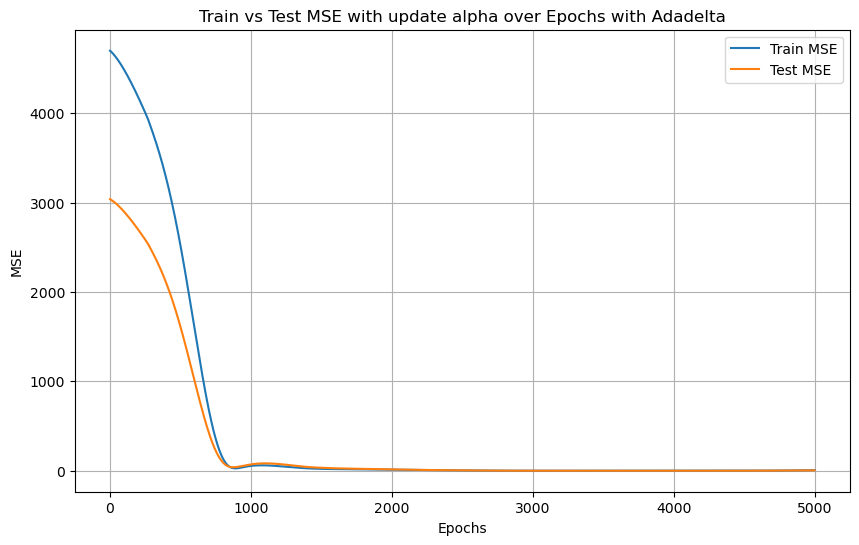

In [90]:
np.random.seed(42)
# پارامترهای اولیه
np.random.seed(42)
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
rho = 0.8  # فاکتور فراموشی
epsilon = 1e-7  # مقدار کوچک برای جلوگیری از تقسیم بر صفر

# متغیرهای Adadelta
grad_squared_alpha = np.zeros_like(alpha)
grad_squared_teta = np.zeros_like(teta)
delta_squared_alpha = np.zeros_like(alpha)
delta_squared_teta = np.zeros_like(teta)

train_errors = []
test_errors = []

# گرادیان نزولی با Adadelta برای آلفا و تتا
for epoch in range(5000):  # ۵۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_train = mse(y_train, y_pred_train)
    
    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)
    
    # محاسبه گرادیان نسبت به پارامترهای آلفا
    grad_alpha = np.zeros_like(alpha)
    for i in range(len(alpha)):
        delta = np.zeros_like(alpha)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, *(alpha + delta), teta[0], teta[1], teta[2])
        grad_alpha[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]
    
    
    # به‌روزرسانی مجموع مربعات گرادیان‌ها با میانگین نمایی
    grad_squared_alpha = rho * grad_squared_alpha + (1 - rho) * (grad_alpha ** 2)
    grad_squared_teta = rho * grad_squared_teta + (1 - rho) * (grad_teta ** 2)
    
    # محاسبه مقدار به‌روزرسانی پارامترهای آلفا و تتا
    update_alpha = -(np.sqrt(delta_squared_alpha + epsilon) / np.sqrt(grad_squared_alpha + epsilon)) * grad_alpha
    update_teta = -(np.sqrt(delta_squared_teta + epsilon) / np.sqrt(grad_squared_teta + epsilon)) * grad_teta
    
    # به‌روزرسانی مجموع مربعات تغییرات پارامترها
    delta_squared_alpha = rho * delta_squared_alpha + (1 - rho) * (update_alpha ** 2)
    delta_squared_teta = rho * delta_squared_teta + (1 - rho) * (update_teta ** 2)
    
    # به‌روزرسانی پارامترهای آلفا و تتا
    alpha += update_alpha
    teta += update_teta

print('MSE :' , test_errors[-1])

# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE with update alpha over Epochs with Adadelta')
plt.legend()
plt.grid(True)
plt.show()

MSE : 186148.00357801697


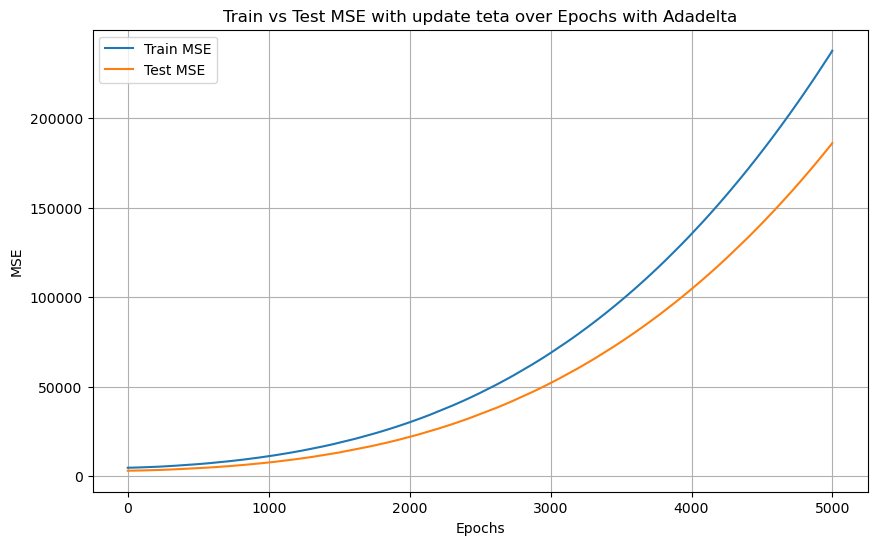

In [91]:
np.random.seed(42)
# پارامترهای اولیه
np.random.seed(42)
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
rho = 0.8  # فاکتور فراموشی
epsilon = 1e-7  # مقدار کوچک برای جلوگیری از تقسیم بر صفر

# متغیرهای Adadelta
grad_squared_alpha = np.zeros_like(alpha)
grad_squared_teta = np.zeros_like(teta)
delta_squared_alpha = np.zeros_like(alpha)
delta_squared_teta = np.zeros_like(teta)

train_errors = []
test_errors = []

# گرادیان نزولی با Adadelta برای آلفا و تتا
for epoch in range(5000):  # ۵۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_train = mse(y_train, y_pred_train)
    
    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)
    
    
    # محاسبه گرادیان نسبت به پارامترهای تتا
    grad_teta = np.zeros_like(teta)
    for i in range(len(teta)):
        delta = np.zeros_like(teta)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], *(teta + delta))
        grad_teta[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]
    
    # به‌روزرسانی مجموع مربعات گرادیان‌ها با میانگین نمایی
    grad_squared_alpha = rho * grad_squared_alpha + (1 - rho) * (grad_alpha ** 2)
    grad_squared_teta = rho * grad_squared_teta + (1 - rho) * (grad_teta ** 2)
    
    # محاسبه مقدار به‌روزرسانی پارامترهای آلفا و تتا
    update_alpha = -(np.sqrt(delta_squared_alpha + epsilon) / np.sqrt(grad_squared_alpha + epsilon)) * grad_alpha
    update_teta = -(np.sqrt(delta_squared_teta + epsilon) / np.sqrt(grad_squared_teta + epsilon)) * grad_teta
    
    # به‌روزرسانی مجموع مربعات تغییرات پارامترها
    delta_squared_alpha = rho * delta_squared_alpha + (1 - rho) * (update_alpha ** 2)
    delta_squared_teta = rho * delta_squared_teta + (1 - rho) * (update_teta ** 2)
    
    # به‌روزرسانی پارامترهای آلفا و تتا
    alpha += update_alpha
    teta += update_teta

print('MSE :' , test_errors[-1])

# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE with update teta over Epochs with Adadelta')
plt.legend()
plt.grid(True)
plt.show()

MSE : 0.05867579898698586


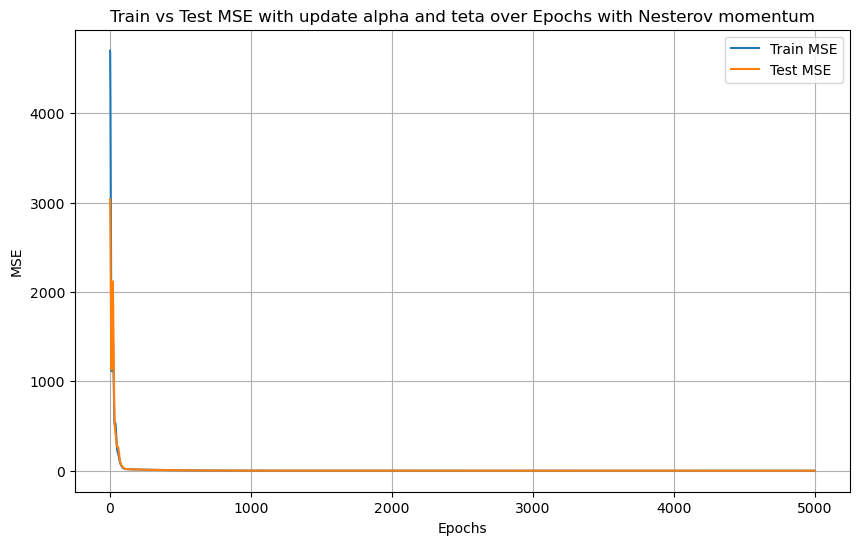

In [96]:
np.random.seed(42)
# پارامترهای اولیه
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
learning_rate = 0.0001
momentum = 0.9  # ضریب مومنتوم
epsilon = 1e-8  # مقدار کوچک برای جلوگیری از تقسیم بر صفر

# متغیرهای مومنتوم برای Nesterov
v_alpha = np.zeros_like(alpha)
v_teta = np.zeros_like(teta)

train_errors = []
test_errors = []

# گرادیان نزولی با Nesterov برای آلفا و تتا
for epoch in range(5000):  # ۵۰۰ اپوک برای آموزش
    # مرحله اول: به طور موقت پارامترها را با استفاده از مومنتوم آپدیت می‌کنیم
    alpha_temp = alpha - momentum * v_alpha
    teta_temp = teta - momentum * v_teta

    # محاسبه پیش‌بینی‌ها با پارامترهای موقت
    y_pred_train = F(x_train, alpha_temp[0], alpha_temp[1], alpha_temp[2], alpha_temp[3], alpha_temp[4], alpha_temp[5], teta_temp[0], teta_temp[1], teta_temp[2])
    error_train = mse(y_train, y_pred_train)

    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha_temp[0], alpha_temp[1], alpha_temp[2], alpha_temp[3], alpha_temp[4], alpha_temp[5], teta_temp[0], teta_temp[1], teta_temp[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)

    # محاسبه گرادیان نسبت به پارامترهای آلفا
    grad_alpha = np.zeros_like(alpha)
    for i in range(len(alpha)):
        delta = np.zeros_like(alpha)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, *(alpha_temp + delta), teta_temp[0], teta_temp[1], teta_temp[2])
        grad_alpha[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]

    # محاسبه گرادیان نسبت به پارامترهای تتا
    grad_teta = np.zeros_like(teta)
    for i in range(len(teta)):
        delta = np.zeros_like(teta)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, alpha_temp[0], alpha_temp[1], alpha_temp[2], alpha_temp[3], alpha_temp[4], alpha_temp[5], *(teta_temp + delta))
        grad_teta[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]

    # به‌روزرسانی مومنتوم برای آلفا و تتا
    v_alpha = momentum * v_alpha - learning_rate * grad_alpha
    v_teta = momentum * v_teta - learning_rate * grad_teta

    # به‌روزرسانی نهایی پارامترها
    alpha += v_alpha
    teta += v_teta

print('MSE :' , test_errors[-1])

# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE with update alpha and teta over Epochs with Nesterov momentum')
plt.legend()
plt.grid(True)
plt.show()

MSE : 3.5387133390734355


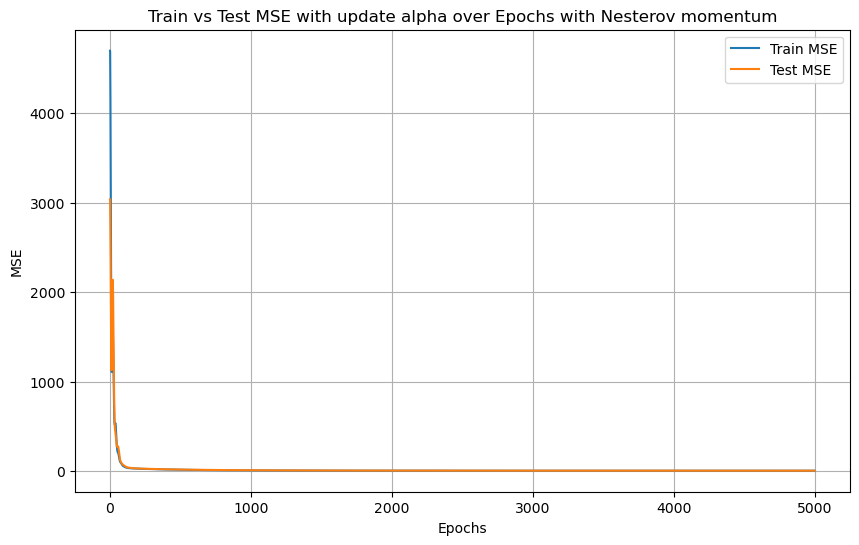

In [97]:
np.random.seed(42)
# پارامترهای اولیه
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
learning_rate = 0.0001
momentum = 0.9  # ضریب مومنتوم
epsilon = 1e-8  # مقدار کوچک برای جلوگیری از تقسیم بر صفر

# متغیرهای مومنتوم برای Nesterov
v_alpha = np.zeros_like(alpha)
v_teta = np.zeros_like(teta)

train_errors = []
test_errors = []

# گرادیان نزولی با Nesterov برای آلفا و تتا
for epoch in range(5000):  # ۵۰۰ اپوک برای آموزش
    # مرحله اول: به طور موقت پارامترها را با استفاده از مومنتوم آپدیت می‌کنیم
    alpha_temp = alpha - momentum * v_alpha
    teta_temp = teta - momentum * v_teta

    # محاسبه پیش‌بینی‌ها با پارامترهای موقت
    y_pred_train = F(x_train, alpha_temp[0], alpha_temp[1], alpha_temp[2], alpha_temp[3], alpha_temp[4], alpha_temp[5], teta_temp[0], teta_temp[1], teta_temp[2])
    error_train = mse(y_train, y_pred_train)

    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha_temp[0], alpha_temp[1], alpha_temp[2], alpha_temp[3], alpha_temp[4], alpha_temp[5], teta_temp[0], teta_temp[1], teta_temp[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)

    # محاسبه گرادیان نسبت به پارامترهای آلفا
    grad_alpha = np.zeros_like(alpha)
    for i in range(len(alpha)):
        delta = np.zeros_like(alpha)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, *(alpha_temp + delta), teta_temp[0], teta_temp[1], teta_temp[2])
        grad_alpha[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]

    # به‌روزرسانی مومنتوم برای آلفا و تتا
    v_alpha = momentum * v_alpha - learning_rate * grad_alpha
    v_teta = momentum * v_teta - learning_rate * grad_teta

    # به‌روزرسانی نهایی پارامترها
    alpha += v_alpha
    teta += v_teta

print('MSE :' , test_errors[-1])

# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE with update alpha over Epochs with Nesterov momentum')
plt.legend()
plt.grid(True)
plt.show()

MSE : 2861.425058062053


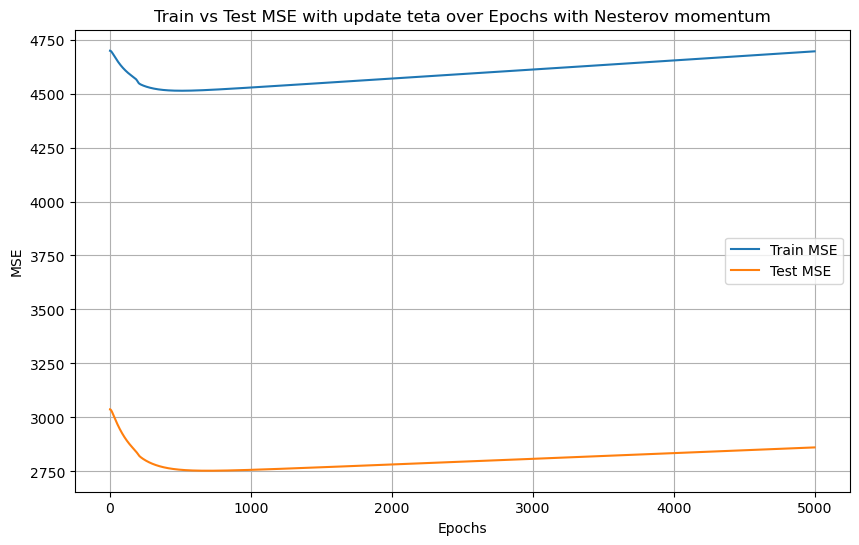

In [99]:
np.random.seed(42)
# پارامترهای اولیه
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
learning_rate = 0.0001
momentum = 0.9  # ضریب مومنتوم
epsilon = 1e-8  # مقدار کوچک برای جلوگیری از تقسیم بر صفر

# متغیرهای مومنتوم برای Nesterov
v_alpha = np.zeros_like(alpha)
v_teta = np.zeros_like(teta)

train_errors = []
test_errors = []

# گرادیان نزولی با Nesterov برای آلفا و تتا
for epoch in range(5000):  # ۵۰۰ اپوک برای آموزش
    # مرحله اول: به طور موقت پارامترها را با استفاده از مومنتوم آپدیت می‌کنیم
    alpha_temp = alpha - momentum * v_alpha
    teta_temp = teta - momentum * v_teta

    # محاسبه پیش‌بینی‌ها با پارامترهای موقت
    y_pred_train = F(x_train, alpha_temp[0], alpha_temp[1], alpha_temp[2], alpha_temp[3], alpha_temp[4], alpha_temp[5], teta_temp[0], teta_temp[1], teta_temp[2])
    error_train = mse(y_train, y_pred_train)

    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha_temp[0], alpha_temp[1], alpha_temp[2], alpha_temp[3], alpha_temp[4], alpha_temp[5], teta_temp[0], teta_temp[1], teta_temp[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)

    # محاسبه گرادیان نسبت به پارامترهای تتا
    grad_teta = np.zeros_like(teta)
    for i in range(len(teta)):
        delta = np.zeros_like(teta)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, alpha_temp[0], alpha_temp[1], alpha_temp[2], alpha_temp[3], alpha_temp[4], alpha_temp[5], *(teta_temp + delta))
        grad_teta[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]

    # به‌روزرسانی مومنتوم برای آلفا و تتا
    v_alpha = momentum * v_alpha - learning_rate * grad_alpha
    v_teta = momentum * v_teta - learning_rate * grad_teta

    # به‌روزرسانی نهایی پارامترها
    alpha += v_alpha
    teta += v_teta

print('MSE :' , test_errors[-1])

# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE with update teta over Epochs with Nesterov momentum')
plt.legend()
plt.grid(True)
plt.show()

MSE : 0.054022023624122104


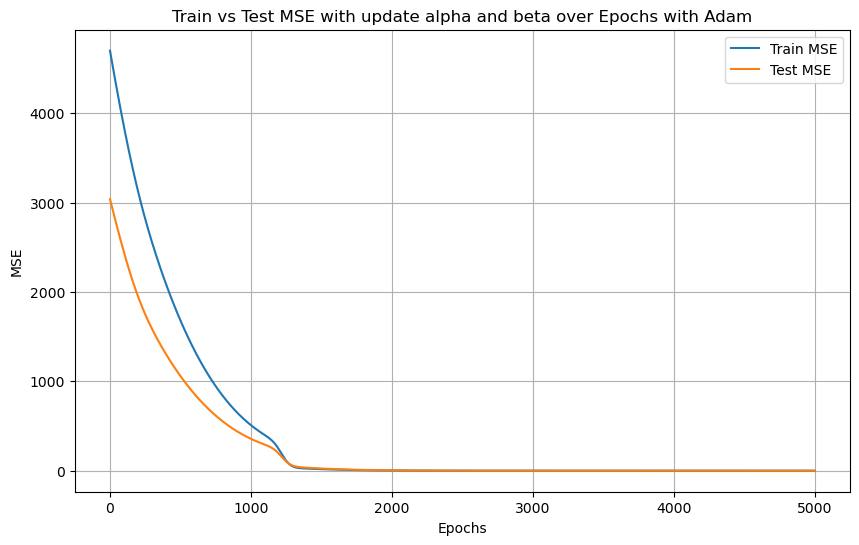

In [103]:
# پارامترهای اولیه
np.random.seed(42)
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
learning_rate = 0.005
beta1 = 0.9  # ضریب برای محاسبه میانگین نمایی گرادیان
beta2 = 0.999  # ضریب برای محاسبه میانگین نمایی مربعات گرادیان
epsilon = 1e-8  # مقدار کوچک برای جلوگیری از تقسیم بر صفر

# متغیرهای Adam
m_alpha = np.zeros_like(alpha)
v_alpha = np.zeros_like(alpha)
m_teta = np.zeros_like(teta)
v_teta = np.zeros_like(teta)

train_errors = []
test_errors = []

# گرادیان نزولی با Adam برای آلفا و تتا
for epoch in range(5000):  # ۵۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_train = mse(y_train, y_pred_train)
    
    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)

    # محاسبه گرادیان نسبت به پارامترهای آلفا
    grad_alpha = np.zeros_like(alpha)
    for i in range(len(alpha)):
        delta = np.zeros_like(alpha)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, *(alpha + delta), teta[0], teta[1], teta[2])
        grad_alpha[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]

    # محاسبه گرادیان نسبت به پارامترهای تتا
    grad_teta = np.zeros_like(teta)
    for i in range(len(teta)):
        delta = np.zeros_like(teta)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], *(teta + delta))
        grad_teta[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]

    # به‌روزرسانی متغیرهای Adam برای آلفا
    m_alpha = beta1 * m_alpha + (1 - beta1) * grad_alpha
    v_alpha = beta2 * v_alpha + (1 - beta2) * (grad_alpha ** 2)
    
    # تصحیح بایاس برای آلفا
    m_hat_alpha = m_alpha / (1 - beta1**(epoch + 1))
    v_hat_alpha = v_alpha / (1 - beta2**(epoch + 1))

    # به‌روزرسانی متغیرهای Adam برای تتا
    m_teta = beta1 * m_teta + (1 - beta1) * grad_teta
    v_teta = beta2 * v_teta + (1 - beta2) * (grad_teta ** 2)
    
    # تصحیح بایاس برای تتا
    m_hat_teta = m_teta / (1 - beta1**(epoch + 1))
    v_hat_teta = v_teta / (1 - beta2**(epoch + 1))

    # به‌روزرسانی پارامترهای آلفا و تتا
    alpha -= learning_rate * m_hat_alpha / (np.sqrt(v_hat_alpha) + epsilon)
    teta -= learning_rate * m_hat_teta / (np.sqrt(v_hat_teta) + epsilon)

print('MSE :' , test_errors[-1])

# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE with update alpha and beta over Epochs with Adam')
plt.legend()
plt.grid(True)
plt.show()

MSE : 2.8218143164646423


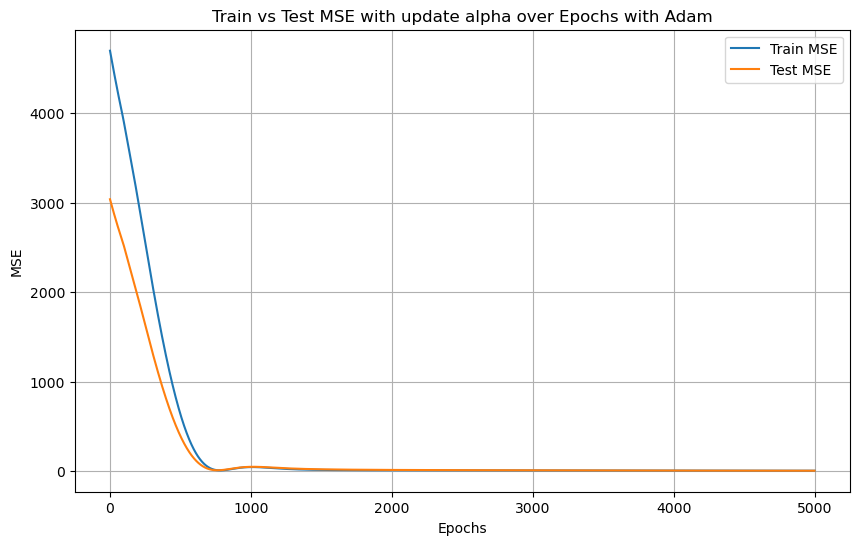

In [104]:
# پارامترهای اولیه
np.random.seed(42)
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
learning_rate = 0.005
beta1 = 0.9  # ضریب برای محاسبه میانگین نمایی گرادیان
beta2 = 0.999  # ضریب برای محاسبه میانگین نمایی مربعات گرادیان
epsilon = 1e-8  # مقدار کوچک برای جلوگیری از تقسیم بر صفر

# متغیرهای Adam
m_alpha = np.zeros_like(alpha)
v_alpha = np.zeros_like(alpha)
m_teta = np.zeros_like(teta)
v_teta = np.zeros_like(teta)

train_errors = []
test_errors = []

# گرادیان نزولی با Adam برای آلفا و تتا
for epoch in range(5000):  # ۵۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_train = mse(y_train, y_pred_train)
    
    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)

    # محاسبه گرادیان نسبت به پارامترهای آلفا
    grad_alpha = np.zeros_like(alpha)
    for i in range(len(alpha)):
        delta = np.zeros_like(alpha)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, *(alpha + delta), teta[0], teta[1], teta[2])
        grad_alpha[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]

    # به‌روزرسانی متغیرهای Adam برای آلفا
    m_alpha = beta1 * m_alpha + (1 - beta1) * grad_alpha
    v_alpha = beta2 * v_alpha + (1 - beta2) * (grad_alpha ** 2)
    
    # تصحیح بایاس برای آلفا
    m_hat_alpha = m_alpha / (1 - beta1**(epoch + 1))
    v_hat_alpha = v_alpha / (1 - beta2**(epoch + 1))

    # به‌روزرسانی متغیرهای Adam برای تتا
    m_teta = beta1 * m_teta + (1 - beta1) * grad_teta
    v_teta = beta2 * v_teta + (1 - beta2) * (grad_teta ** 2)
    
    # تصحیح بایاس برای تتا
    m_hat_teta = m_teta / (1 - beta1**(epoch + 1))
    v_hat_teta = v_teta / (1 - beta2**(epoch + 1))

    # به‌روزرسانی پارامترهای آلفا و تتا
    alpha -= learning_rate * m_hat_alpha / (np.sqrt(v_hat_alpha) + epsilon)
    teta -= learning_rate * m_hat_teta / (np.sqrt(v_hat_teta) + epsilon)

print('MSE :' , test_errors[-1])

# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE with update alpha over Epochs with Adam')
plt.legend()
plt.grid(True)
plt.show()

MSE : 12335.820731335743


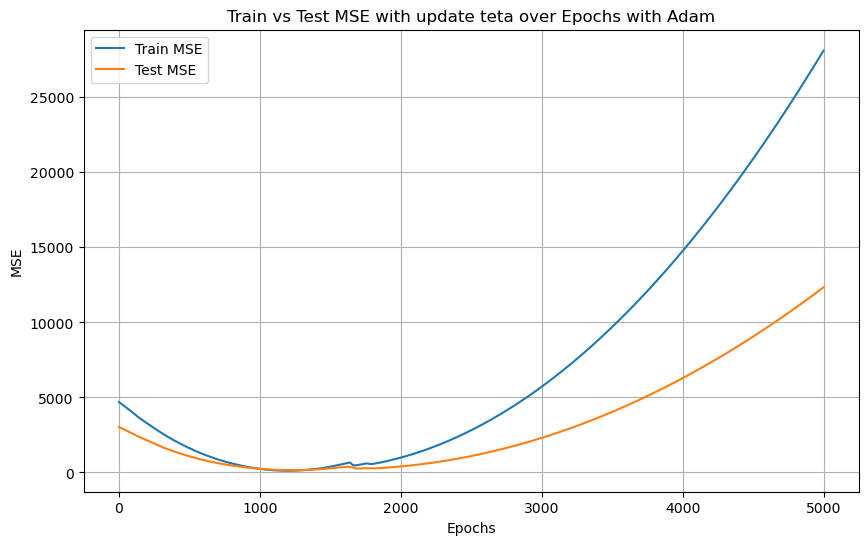

In [105]:
# پارامترهای اولیه
np.random.seed(42)
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
learning_rate = 0.005
beta1 = 0.9  # ضریب برای محاسبه میانگین نمایی گرادیان
beta2 = 0.999  # ضریب برای محاسبه میانگین نمایی مربعات گرادیان
epsilon = 1e-8  # مقدار کوچک برای جلوگیری از تقسیم بر صفر

# متغیرهای Adam
m_alpha = np.zeros_like(alpha)
v_alpha = np.zeros_like(alpha)
m_teta = np.zeros_like(teta)
v_teta = np.zeros_like(teta)

train_errors = []
test_errors = []

# گرادیان نزولی با Adam برای آلفا و تتا
for epoch in range(5000):  # ۵۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_train = mse(y_train, y_pred_train)
    
    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)

    # محاسبه گرادیان نسبت به پارامترهای تتا
    grad_teta = np.zeros_like(teta)
    for i in range(len(teta)):
        delta = np.zeros_like(teta)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], *(teta + delta))
        grad_teta[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]

    # به‌روزرسانی متغیرهای Adam برای آلفا
    m_alpha = beta1 * m_alpha + (1 - beta1) * grad_alpha
    v_alpha = beta2 * v_alpha + (1 - beta2) * (grad_alpha ** 2)
    
    # تصحیح بایاس برای آلفا
    m_hat_alpha = m_alpha / (1 - beta1**(epoch + 1))
    v_hat_alpha = v_alpha / (1 - beta2**(epoch + 1))

    # به‌روزرسانی متغیرهای Adam برای تتا
    m_teta = beta1 * m_teta + (1 - beta1) * grad_teta
    v_teta = beta2 * v_teta + (1 - beta2) * (grad_teta ** 2)
    
    # تصحیح بایاس برای تتا
    m_hat_teta = m_teta / (1 - beta1**(epoch + 1))
    v_hat_teta = v_teta / (1 - beta2**(epoch + 1))

    # به‌روزرسانی پارامترهای آلفا و تتا
    alpha -= learning_rate * m_hat_alpha / (np.sqrt(v_hat_alpha) + epsilon)
    teta -= learning_rate * m_hat_teta / (np.sqrt(v_hat_teta) + epsilon)

print('MSE :' , test_errors[-1])

# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE with update teta over Epochs with Adam')
plt.legend()
plt.grid(True)
plt.show()

MSE : 0.12963304508193846


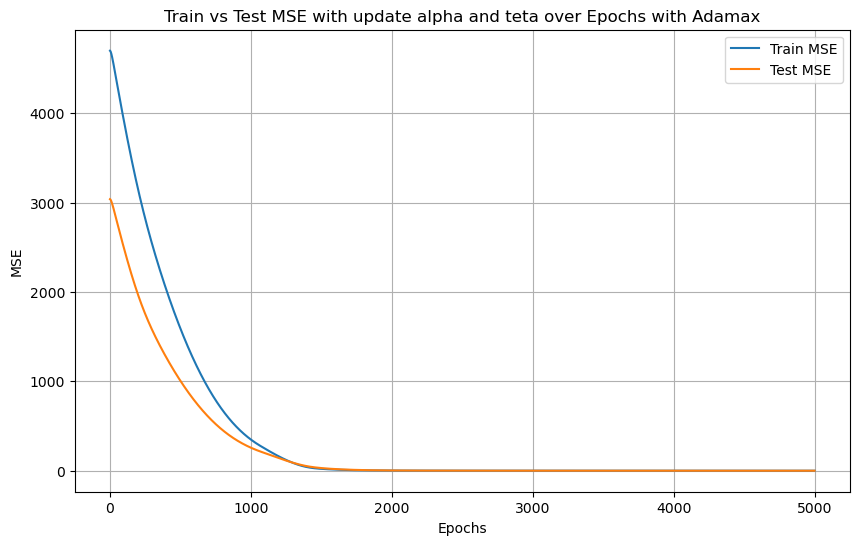

In [109]:
# پارامترهای اولیه
np.random.seed(42)
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
learning_rate = 0.005
beta1 = 0.9  # ضریب برای محاسبه میانگین نمایی گرادیان
beta2 = 0.999  # ضریب برای محاسبه حداکثر گرادیان
epsilon = 1e-8  # مقدار کوچک برای جلوگیری از تقسیم بر صفر

# متغیرهای Adamax
m_alpha = np.zeros_like(alpha)
u_alpha = np.zeros_like(alpha)
m_teta = np.zeros_like(teta)
u_teta = np.zeros_like(teta)

train_errors = []
test_errors = []

# گرادیان نزولی با Adamax برای آلفا و تتا
for epoch in range(5000):  # ۵۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_train = mse(y_train, y_pred_train)
    
    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)

    # محاسبه گرادیان نسبت به پارامترهای آلفا
    grad_alpha = np.zeros_like(alpha)
    for i in range(len(alpha)):
        delta = np.zeros_like(alpha)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, *(alpha + delta), teta[0], teta[1], teta[2])
        grad_alpha[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]

    # محاسبه گرادیان نسبت به پارامترهای تتا
    grad_teta = np.zeros_like(teta)
    for i in range(len(teta)):
        delta = np.zeros_like(teta)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], *(teta + delta))
        grad_teta[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]

    # به‌روزرسانی متغیرهای Adamax برای آلفا
    m_alpha = beta1 * m_alpha + (1 - beta1) * grad_alpha
    u_alpha = np.maximum(beta2 * u_alpha, np.abs(grad_alpha))

    # به‌روزرسانی متغیرهای Adamax برای تتا
    m_teta = beta1 * m_teta + (1 - beta1) * grad_teta
    u_teta = np.maximum(beta2 * u_teta, np.abs(grad_teta))

    # به‌روزرسانی پارامترهای آلفا و تتا
    alpha -= (learning_rate / (u_alpha + epsilon)) * m_alpha
    teta -= (learning_rate / (u_teta + epsilon)) * m_teta

print('MSE :' , test_errors[-1])

# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE with update alpha and teta over Epochs with Adamax')
plt.legend()
plt.grid(True)
plt.show()

MSE : 0.7367757582531931


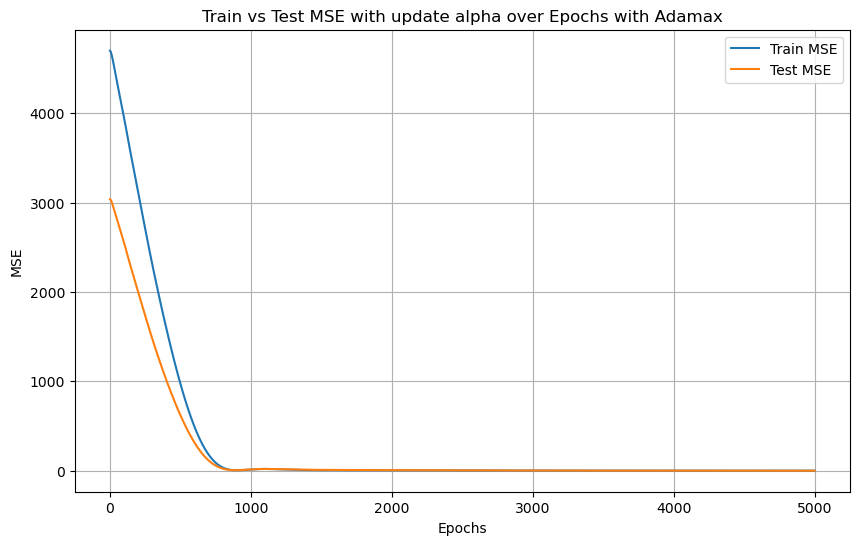

In [110]:
# پارامترهای اولیه
np.random.seed(42)
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
learning_rate = 0.005
beta1 = 0.9  # ضریب برای محاسبه میانگین نمایی گرادیان
beta2 = 0.999  # ضریب برای محاسبه حداکثر گرادیان
epsilon = 1e-8  # مقدار کوچک برای جلوگیری از تقسیم بر صفر

# متغیرهای Adamax
m_alpha = np.zeros_like(alpha)
u_alpha = np.zeros_like(alpha)
m_teta = np.zeros_like(teta)
u_teta = np.zeros_like(teta)

train_errors = []
test_errors = []

# گرادیان نزولی با Adamax برای آلفا و تتا
for epoch in range(5000):  # ۵۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_train = mse(y_train, y_pred_train)
    
    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)

    # محاسبه گرادیان نسبت به پارامترهای آلفا
    grad_alpha = np.zeros_like(alpha)
    for i in range(len(alpha)):
        delta = np.zeros_like(alpha)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, *(alpha + delta), teta[0], teta[1], teta[2])
        grad_alpha[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]


    # به‌روزرسانی متغیرهای Adamax برای آلفا
    m_alpha = beta1 * m_alpha + (1 - beta1) * grad_alpha
    u_alpha = np.maximum(beta2 * u_alpha, np.abs(grad_alpha))

    # به‌روزرسانی متغیرهای Adamax برای تتا
    m_teta = beta1 * m_teta + (1 - beta1) * grad_teta
    u_teta = np.maximum(beta2 * u_teta, np.abs(grad_teta))

    # به‌روزرسانی پارامترهای آلفا و تتا
    alpha -= (learning_rate / (u_alpha + epsilon)) * m_alpha
    teta -= (learning_rate / (u_teta + epsilon)) * m_teta

print('MSE :' , test_errors[-1])

# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE with update alpha over Epochs with Adamax')
plt.legend()
plt.grid(True)
plt.show()

MSE : 17272.51870169416


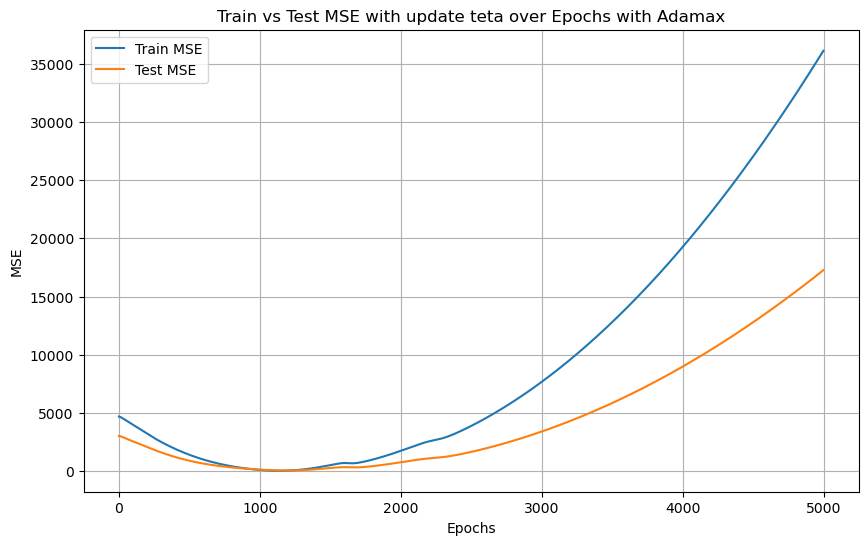

In [111]:
# پارامترهای اولیه
np.random.seed(42)
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
learning_rate = 0.005
beta1 = 0.9  # ضریب برای محاسبه میانگین نمایی گرادیان
beta2 = 0.999  # ضریب برای محاسبه حداکثر گرادیان
epsilon = 1e-8  # مقدار کوچک برای جلوگیری از تقسیم بر صفر

# متغیرهای Adamax
m_alpha = np.zeros_like(alpha)
u_alpha = np.zeros_like(alpha)
m_teta = np.zeros_like(teta)
u_teta = np.zeros_like(teta)

train_errors = []
test_errors = []

# گرادیان نزولی با Adamax برای آلفا و تتا
for epoch in range(5000):  # ۵۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_train = mse(y_train, y_pred_train)
    
    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)


    # محاسبه گرادیان نسبت به پارامترهای تتا
    grad_teta = np.zeros_like(teta)
    for i in range(len(teta)):
        delta = np.zeros_like(teta)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], *(teta + delta))
        grad_teta[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]

    # به‌روزرسانی متغیرهای Adamax برای آلفا
    m_alpha = beta1 * m_alpha + (1 - beta1) * grad_alpha
    u_alpha = np.maximum(beta2 * u_alpha, np.abs(grad_alpha))

    # به‌روزرسانی متغیرهای Adamax برای تتا
    m_teta = beta1 * m_teta + (1 - beta1) * grad_teta
    u_teta = np.maximum(beta2 * u_teta, np.abs(grad_teta))

    # به‌روزرسانی پارامترهای آلفا و تتا
    alpha -= (learning_rate / (u_alpha + epsilon)) * m_alpha
    teta -= (learning_rate / (u_teta + epsilon)) * m_teta

print('MSE :' , test_errors[-1])

# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE with update teta over Epochs with Adamax')
plt.legend()
plt.grid(True)
plt.show()

MSE : 0.05340146116632553


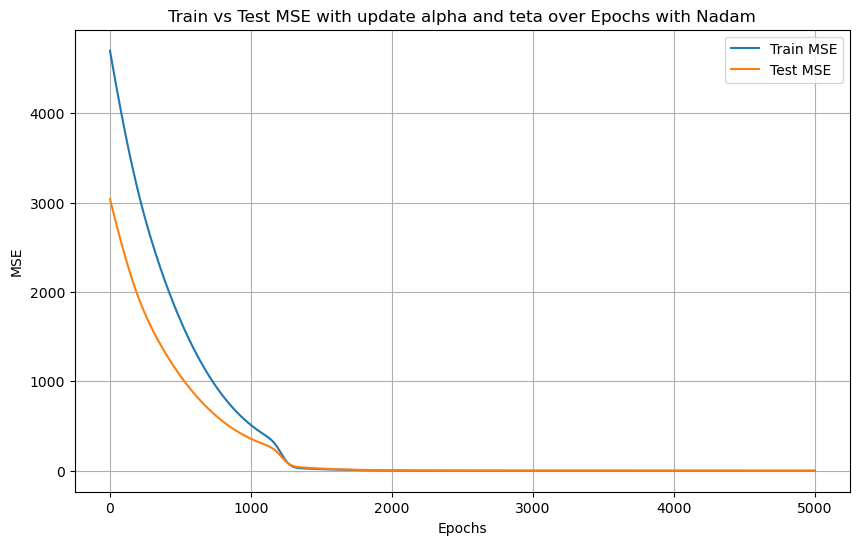

In [113]:
# پارامترهای اولیه
np.random.seed(42)
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
learning_rate = 0.005
beta1 = 0.9  # ضریب برای محاسبه میانگین نمایی گرادیان
beta2 = 0.999  # ضریب برای محاسبه میانگین نمایی مربعات گرادیان
epsilon = 1e-8  # مقدار کوچک برای جلوگیری از تقسیم بر صفر

# متغیرهای Nadam
m_alpha = np.zeros_like(alpha)
v_alpha = np.zeros_like(alpha)
m_teta = np.zeros_like(teta)
v_teta = np.zeros_like(teta)

train_errors = []
test_errors = []

# گرادیان نزولی با Nadam برای آلفا و تتا
for epoch in range(5000):  # ۵۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_train = mse(y_train, y_pred_train)
    
    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)

    # محاسبه گرادیان نسبت به پارامترهای آلفا
    grad_alpha = np.zeros_like(alpha)
    for i in range(len(alpha)):
        delta = np.zeros_like(alpha)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, *(alpha + delta), teta[0], teta[1], teta[2])
        grad_alpha[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]

    # محاسبه گرادیان نسبت به پارامترهای تتا
    grad_teta = np.zeros_like(teta)
    for i in range(len(teta)):
        delta = np.zeros_like(teta)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], *(teta + delta))
        grad_teta[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]

    # به‌روزرسانی متغیرهای m_alpha و v_alpha
    m_alpha = beta1 * m_alpha + (1 - beta1) * grad_alpha
    v_alpha = beta2 * v_alpha + (1 - beta2) * (grad_alpha ** 2)
    
    # به‌روزرسانی متغیرهای m_teta و v_teta
    m_teta = beta1 * m_teta + (1 - beta1) * grad_teta
    v_teta = beta2 * v_teta + (1 - beta2) * (grad_teta ** 2)
    
    # تصحیح بایاس
    m_hat_alpha = m_alpha / (1 - beta1**(epoch + 1))
    v_hat_alpha = v_alpha / (1 - beta2**(epoch + 1))
    m_hat_teta = m_teta / (1 - beta1**(epoch + 1))
    v_hat_teta = v_teta / (1 - beta2**(epoch + 1))

    # محاسبه به‌روزرسانی با استفاده از Nesterov در Nadam
    alpha_update = (beta1 * m_hat_alpha + (1 - beta1) * grad_alpha) / (np.sqrt(v_hat_alpha) + epsilon)
    teta_update = (beta1 * m_hat_teta + (1 - beta1) * grad_teta) / (np.sqrt(v_hat_teta) + epsilon)

    # به‌روزرسانی پارامترهای آلفا و تتا
    alpha -= learning_rate * alpha_update
    teta -= learning_rate * teta_update

print('MSE :' , test_errors[-1])

# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE with update alpha and teta over Epochs with Nadam')
plt.legend()
plt.grid(True)
plt.show()

MSE : 2.8375063189311778


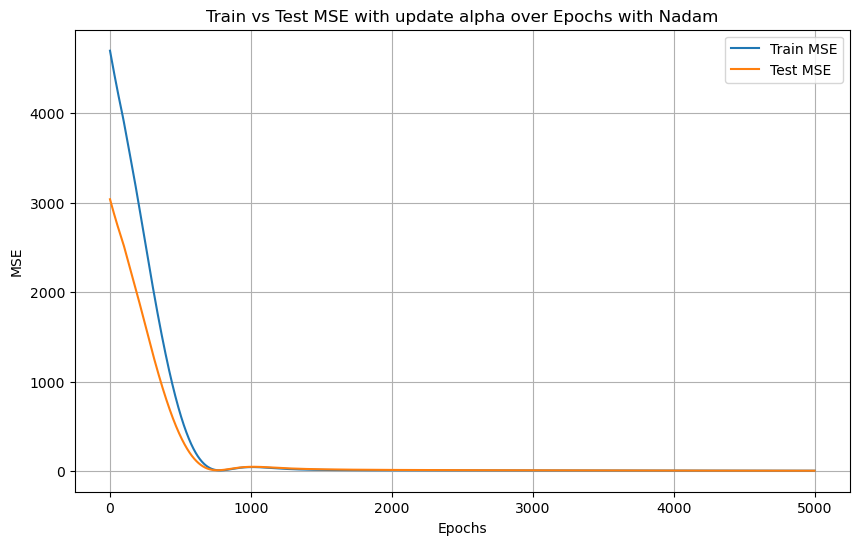

In [114]:
# پارامترهای اولیه
np.random.seed(42)
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
learning_rate = 0.005
beta1 = 0.9  # ضریب برای محاسبه میانگین نمایی گرادیان
beta2 = 0.999  # ضریب برای محاسبه میانگین نمایی مربعات گرادیان
epsilon = 1e-8  # مقدار کوچک برای جلوگیری از تقسیم بر صفر

# متغیرهای Nadam
m_alpha = np.zeros_like(alpha)
v_alpha = np.zeros_like(alpha)
m_teta = np.zeros_like(teta)
v_teta = np.zeros_like(teta)

train_errors = []
test_errors = []

# گرادیان نزولی با Nadam برای آلفا و تتا
for epoch in range(5000):  # ۵۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_train = mse(y_train, y_pred_train)
    
    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)

    # محاسبه گرادیان نسبت به پارامترهای آلفا
    grad_alpha = np.zeros_like(alpha)
    for i in range(len(alpha)):
        delta = np.zeros_like(alpha)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, *(alpha + delta), teta[0], teta[1], teta[2])
        grad_alpha[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]


    # به‌روزرسانی متغیرهای m_alpha و v_alpha
    m_alpha = beta1 * m_alpha + (1 - beta1) * grad_alpha
    v_alpha = beta2 * v_alpha + (1 - beta2) * (grad_alpha ** 2)
    
    # به‌روزرسانی متغیرهای m_teta و v_teta
    m_teta = beta1 * m_teta + (1 - beta1) * grad_teta
    v_teta = beta2 * v_teta + (1 - beta2) * (grad_teta ** 2)
    
    # تصحیح بایاس
    m_hat_alpha = m_alpha / (1 - beta1**(epoch + 1))
    v_hat_alpha = v_alpha / (1 - beta2**(epoch + 1))
    m_hat_teta = m_teta / (1 - beta1**(epoch + 1))
    v_hat_teta = v_teta / (1 - beta2**(epoch + 1))

    # محاسبه به‌روزرسانی با استفاده از Nesterov در Nadam
    alpha_update = (beta1 * m_hat_alpha + (1 - beta1) * grad_alpha) / (np.sqrt(v_hat_alpha) + epsilon)
    teta_update = (beta1 * m_hat_teta + (1 - beta1) * grad_teta) / (np.sqrt(v_hat_teta) + epsilon)

    # به‌روزرسانی پارامترهای آلفا و تتا
    alpha -= learning_rate * alpha_update
    teta -= learning_rate * teta_update

print('MSE :' , test_errors[-1])

# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE with update alpha over Epochs with Nadam')
plt.legend()
plt.grid(True)
plt.show()

MSE : 12335.81130297221


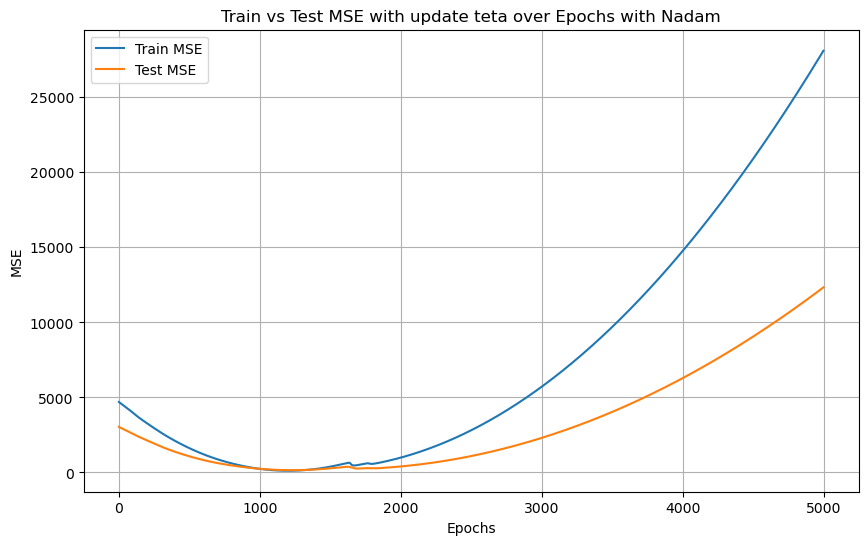

In [115]:
# پارامترهای اولیه
np.random.seed(42)
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
learning_rate = 0.005
beta1 = 0.9  # ضریب برای محاسبه میانگین نمایی گرادیان
beta2 = 0.999  # ضریب برای محاسبه میانگین نمایی مربعات گرادیان
epsilon = 1e-8  # مقدار کوچک برای جلوگیری از تقسیم بر صفر

# متغیرهای Nadam
m_alpha = np.zeros_like(alpha)
v_alpha = np.zeros_like(alpha)
m_teta = np.zeros_like(teta)
v_teta = np.zeros_like(teta)

train_errors = []
test_errors = []

# گرادیان نزولی با Nadam برای آلفا و تتا
for epoch in range(5000):  # ۵۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_train = mse(y_train, y_pred_train)
    
    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)


    # محاسبه گرادیان نسبت به پارامترهای تتا
    grad_teta = np.zeros_like(teta)
    for i in range(len(teta)):
        delta = np.zeros_like(teta)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], *(teta + delta))
        grad_teta[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]

    # به‌روزرسانی متغیرهای m_alpha و v_alpha
    m_alpha = beta1 * m_alpha + (1 - beta1) * grad_alpha
    v_alpha = beta2 * v_alpha + (1 - beta2) * (grad_alpha ** 2)
    
    # به‌روزرسانی متغیرهای m_teta و v_teta
    m_teta = beta1 * m_teta + (1 - beta1) * grad_teta
    v_teta = beta2 * v_teta + (1 - beta2) * (grad_teta ** 2)
    
    # تصحیح بایاس
    m_hat_alpha = m_alpha / (1 - beta1**(epoch + 1))
    v_hat_alpha = v_alpha / (1 - beta2**(epoch + 1))
    m_hat_teta = m_teta / (1 - beta1**(epoch + 1))
    v_hat_teta = v_teta / (1 - beta2**(epoch + 1))

    # محاسبه به‌روزرسانی با استفاده از Nesterov در Nadam
    alpha_update = (beta1 * m_hat_alpha + (1 - beta1) * grad_alpha) / (np.sqrt(v_hat_alpha) + epsilon)
    teta_update = (beta1 * m_hat_teta + (1 - beta1) * grad_teta) / (np.sqrt(v_hat_teta) + epsilon)

    # به‌روزرسانی پارامترهای آلفا و تتا
    alpha -= learning_rate * alpha_update
    teta -= learning_rate * teta_update

print('MSE :' , test_errors[-1])

# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE with update teta over Epochs with Nadam')
plt.legend()
plt.grid(True)
plt.show()

MSE : 0.06535485930427709


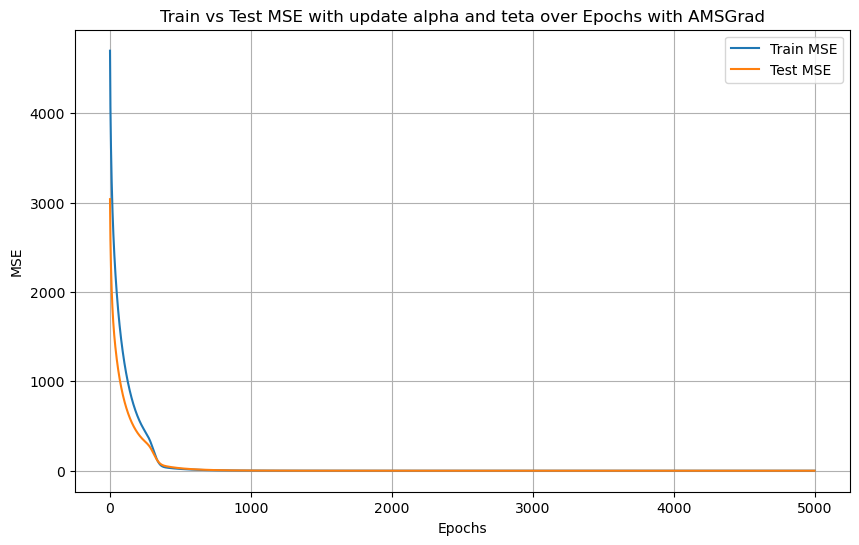

In [121]:
# پارامترهای اولیه
np.random.seed(42)
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
learning_rate = 0.005
beta1 = 0.9  # ضریب برای محاسبه میانگین نمایی گرادیان
beta2 = 0.999  # ضریب برای محاسبه میانگین نمایی مربعات گرادیان
epsilon = 1e-8  # مقدار کوچک برای جلوگیری از تقسیم بر صفر

# متغیرهای AMSGrad
m_alpha = np.zeros_like(alpha)
v_alpha = np.zeros_like(alpha)
v_hat_alpha = np.zeros_like(alpha)  # متغیر برای ذخیره حداکثر مقدار قبلی در AMSGrad
m_teta = np.zeros_like(teta)
v_teta = np.zeros_like(teta)
v_hat_teta = np.zeros_like(teta)  # متغیر برای ذخیره حداکثر مقدار قبلی در AMSGrad

train_errors = []
test_errors = []

# گرادیان نزولی با AMSGrad برای آلفا و تتا
for epoch in range(5000):  # ۵۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_train = mse(y_train, y_pred_train)
    
    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)

    # محاسبه گرادیان نسبت به پارامترهای آلفا
    grad_alpha = np.zeros_like(alpha)
    for i in range(len(alpha)):
        delta = np.zeros_like(alpha)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, *(alpha + delta), teta[0], teta[1], teta[2])
        grad_alpha[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]

    # محاسبه گرادیان نسبت به پارامترهای تتا
    grad_teta = np.zeros_like(teta)
    for i in range(len(teta)):
        delta = np.zeros_like(teta)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], *(teta + delta))
        grad_teta[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]

    # به‌روزرسانی متغیرهای m_alpha و v_alpha
    m_alpha = beta1 * m_alpha + (1 - beta1) * grad_alpha
    v_alpha = beta2 * v_alpha + (1 - beta2) * (grad_alpha ** 2)
    
    # به‌روزرسانی متغیرهای m_teta و v_teta
    m_teta = beta1 * m_teta + (1 - beta1) * grad_teta
    v_teta = beta2 * v_teta + (1 - beta2) * (grad_teta ** 2)
    
    # به‌روزرسانی v_hat با حداکثر مقدار برای AMSGrad
    v_hat_alpha = np.maximum(v_hat_alpha, v_alpha)
    v_hat_teta = np.maximum(v_hat_teta, v_teta)

    # تصحیح بایاس
    m_hat_alpha = m_alpha / (1 - beta1**(epoch + 1))
    m_hat_teta = m_teta / (1 - beta1**(epoch + 1))

    # به‌روزرسانی پارامترهای آلفا و تتا
    alpha -= learning_rate * m_hat_alpha / (np.sqrt(v_hat_alpha) + epsilon)
    teta -= learning_rate * m_hat_teta / (np.sqrt(v_hat_teta) + epsilon)

print('MSE :' , test_errors[-1])

# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE with update alpha and teta over Epochs with AMSGrad')
plt.legend()
plt.grid(True)
plt.show()

MSE : 2.5541672191207625


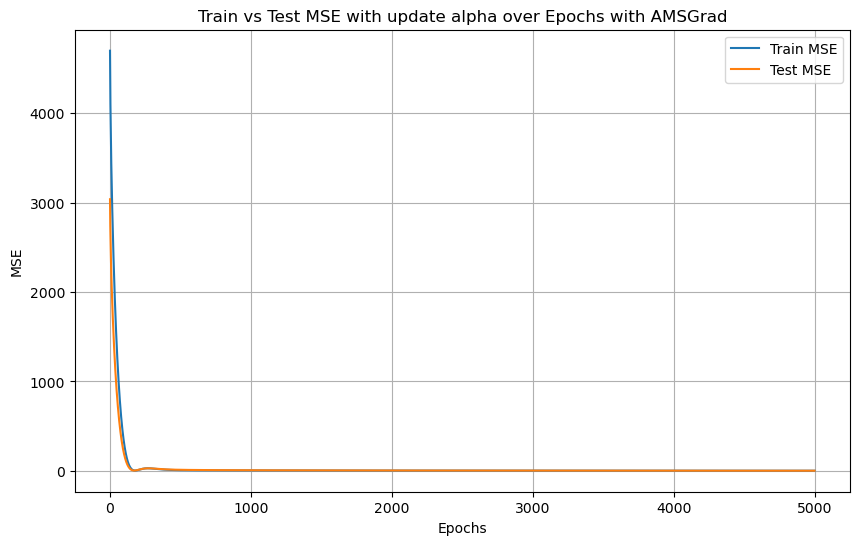

In [122]:
# پارامترهای اولیه
np.random.seed(42)
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
learning_rate = 0.005
beta1 = 0.9  # ضریب برای محاسبه میانگین نمایی گرادیان
beta2 = 0.999  # ضریب برای محاسبه میانگین نمایی مربعات گرادیان
epsilon = 1e-8  # مقدار کوچک برای جلوگیری از تقسیم بر صفر

# متغیرهای AMSGrad
m_alpha = np.zeros_like(alpha)
v_alpha = np.zeros_like(alpha)
v_hat_alpha = np.zeros_like(alpha)  # متغیر برای ذخیره حداکثر مقدار قبلی در AMSGrad
m_teta = np.zeros_like(teta)
v_teta = np.zeros_like(teta)
v_hat_teta = np.zeros_like(teta)  # متغیر برای ذخیره حداکثر مقدار قبلی در AMSGrad

train_errors = []
test_errors = []

# گرادیان نزولی با AMSGrad برای آلفا و تتا
for epoch in range(5000):  # ۵۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_train = mse(y_train, y_pred_train)
    
    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)

    # محاسبه گرادیان نسبت به پارامترهای آلفا
    grad_alpha = np.zeros_like(alpha)
    for i in range(len(alpha)):
        delta = np.zeros_like(alpha)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, *(alpha + delta), teta[0], teta[1], teta[2])
        grad_alpha[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]

    # به‌روزرسانی متغیرهای m_alpha و v_alpha
    m_alpha = beta1 * m_alpha + (1 - beta1) * grad_alpha
    v_alpha = beta2 * v_alpha + (1 - beta2) * (grad_alpha ** 2)
    
    # به‌روزرسانی متغیرهای m_teta و v_teta
    m_teta = beta1 * m_teta + (1 - beta1) * grad_teta
    v_teta = beta2 * v_teta + (1 - beta2) * (grad_teta ** 2)
    
    # به‌روزرسانی v_hat با حداکثر مقدار برای AMSGrad
    v_hat_alpha = np.maximum(v_hat_alpha, v_alpha)
    v_hat_teta = np.maximum(v_hat_teta, v_teta)

    # تصحیح بایاس
    m_hat_alpha = m_alpha / (1 - beta1**(epoch + 1))
    m_hat_teta = m_teta / (1 - beta1**(epoch + 1))

    # به‌روزرسانی پارامترهای آلفا و تتا
    alpha -= learning_rate * m_hat_alpha / (np.sqrt(v_hat_alpha) + epsilon)
    teta -= learning_rate * m_hat_teta / (np.sqrt(v_hat_teta) + epsilon)

print('MSE :' , test_errors[-1])

# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE with update alpha over Epochs with AMSGrad')
plt.legend()
plt.grid(True)
plt.show()

MSE : 23674.46147245506


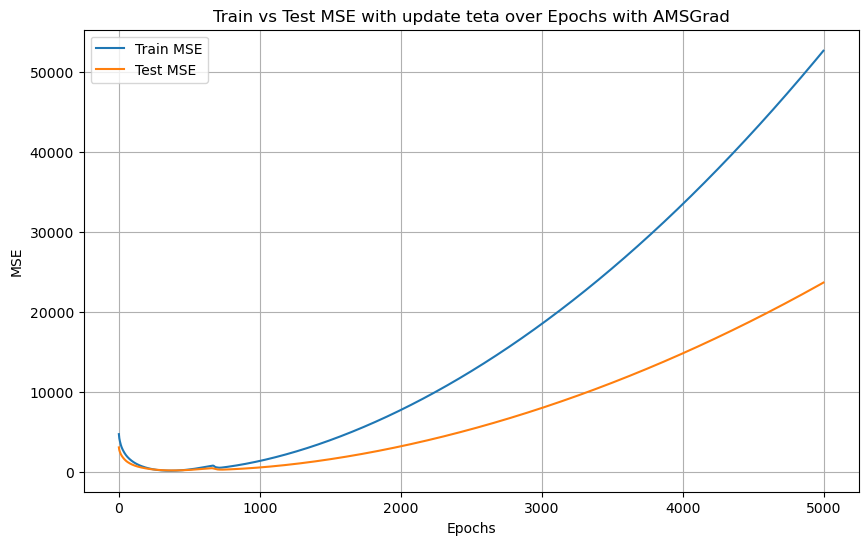

In [123]:
# پارامترهای اولیه
np.random.seed(42)
alpha = np.random.randn(6)  # مقادیر اولیه آلفا
teta = np.random.randn(3)   # مقادیر اولیه تتا
learning_rate = 0.005
beta1 = 0.9  # ضریب برای محاسبه میانگین نمایی گرادیان
beta2 = 0.999  # ضریب برای محاسبه میانگین نمایی مربعات گرادیان
epsilon = 1e-8  # مقدار کوچک برای جلوگیری از تقسیم بر صفر

# متغیرهای AMSGrad
m_alpha = np.zeros_like(alpha)
v_alpha = np.zeros_like(alpha)
v_hat_alpha = np.zeros_like(alpha)  # متغیر برای ذخیره حداکثر مقدار قبلی در AMSGrad
m_teta = np.zeros_like(teta)
v_teta = np.zeros_like(teta)
v_hat_teta = np.zeros_like(teta)  # متغیر برای ذخیره حداکثر مقدار قبلی در AMSGrad

train_errors = []
test_errors = []

# گرادیان نزولی با AMSGrad برای آلفا و تتا
for epoch in range(5000):  # ۵۰۰ اپوک برای آموزش
    y_pred_train = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_train = mse(y_train, y_pred_train)
    
    # محاسبه خطا روی داده‌های آزمون
    y_pred_test = F(x_test, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], teta[0], teta[1], teta[2])
    error_test = mse(y_test, y_pred_test)

    # ذخیره خطاها
    train_errors.append(error_train)
    test_errors.append(error_test)

    # محاسبه گرادیان نسبت به پارامترهای تتا
    grad_teta = np.zeros_like(teta)
    for i in range(len(teta)):
        delta = np.zeros_like(teta)
        delta[i] = 1e-5
        y_pred_delta = F(x_train, alpha[0], alpha[1], alpha[2], alpha[3], alpha[4], alpha[5], *(teta + delta))
        grad_teta[i] = (mse(y_train, y_pred_delta) - error_train) / delta[i]

    # به‌روزرسانی متغیرهای m_alpha و v_alpha
    m_alpha = beta1 * m_alpha + (1 - beta1) * grad_alpha
    v_alpha = beta2 * v_alpha + (1 - beta2) * (grad_alpha ** 2)
    
    # به‌روزرسانی متغیرهای m_teta و v_teta
    m_teta = beta1 * m_teta + (1 - beta1) * grad_teta
    v_teta = beta2 * v_teta + (1 - beta2) * (grad_teta ** 2)
    
    # به‌روزرسانی v_hat با حداکثر مقدار برای AMSGrad
    v_hat_alpha = np.maximum(v_hat_alpha, v_alpha)
    v_hat_teta = np.maximum(v_hat_teta, v_teta)

    # تصحیح بایاس
    m_hat_alpha = m_alpha / (1 - beta1**(epoch + 1))
    m_hat_teta = m_teta / (1 - beta1**(epoch + 1))

    # به‌روزرسانی پارامترهای آلفا و تتا
    alpha -= learning_rate * m_hat_alpha / (np.sqrt(v_hat_alpha) + epsilon)
    teta -= learning_rate * m_hat_teta / (np.sqrt(v_hat_teta) + epsilon)

print('MSE :' , test_errors[-1])

# رسم نمودار خطای train و test
plt.figure(figsize=(10, 6))
plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Train vs Test MSE with update teta over Epochs with AMSGrad')
plt.legend()
plt.grid(True)
plt.show()